<a href="https://colab.research.google.com/github/ArushCreater/Sydney_House_Prices/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import re
import plotly.express as px
import seaborn as sns

Dataset1=pd.read_csv('domain_properties.csv',header=0)
Dataset2=pd.read_csv('Sydney Suburbs Reviews.csv',header=0)

In [ ]:
data_price = Dataset1.copy()
data_price

price date_sold         suburb  num_bath  num_bed  num_parking  \
0       530000   13/1/16      Kincumber         4        4            2   
1       525000   13/1/16     Halekulani         2        4            2   
2       480000   13/1/16  Chittaway Bay         2        4            2   
3       452000   13/1/16        Leumeah         1        3            1   
4       365500   13/1/16    North Avoca         0        0            0   
...        ...       ...            ...       ...      ...          ...   
11155  1900000  31/12/21     Kellyville         3        4            2   
11156  1300000  31/12/21    Seven Hills         3        7            2   
11157  1025000  31/12/21         Sydney         2        2            1   
11158  1087500    1/1/22       Prestons         2        4            2   
11159  1000000    1/1/22       Ourimbah         2        3            2   

       property_size                     type  suburb_population  \
0               1351                    House               7093   
1                594                    House               2538   
2                468                    House               2028   
3                344                    House               9835   
4               1850              Vacant land               2200   
...              ...                      ...                ...   
11155            540                    House              27971   
11156           1208                    House              19326   
11157            129  Apartment / Unit / Flat              17252   
11158            384                    House              15313   
11159            667                    House               3951   

       suburb_median_income  suburb_sqkm  suburb_lat  suburb_lng  \
0                     29432        9.914   -33.47252   151.40208   
1                     24752        1.397   -33.21772   151.55237   
2                     31668        1.116   -33.32678   151.44557   
3                     32292        4.055   -34.05375   150.83957   
4                     45084        1.497   -33.45608   151.43598   
...                     ...          ...         ...         ...   
11155                 46228       18.645   -33.69583   150.95622   
11156                 33540        9.629   -33.77743   150.94272   
11157                 35412        2.940   -33.86794   151.20998   
11158                 36244        9.215   -33.94155   150.87334   
11159                 37180       87.154   -33.31517   151.32611   

       suburb_elevation  cash_rate  property_inflation_index  km_from_cbd  
0                    24        2.0                     150.9        47.05  
1                    23        2.0                     150.9        78.54  
2                     3        2.0                     150.9        63.59  
3                    81        2.0                     150.9        40.12  
4                    18        2.0                     150.9        49.98  
...                 ...        ...                       ...          ...  
11155                78        0.1                     220.1        30.08  
11156                38        0.1                     220.1        26.58  
11157                65        0.1                     220.1         0.31  
11158                28        0.1                     220.1        32.26  
11159               191        0.1                     220.1        61.95  

[11160 rows x 17 columns]

In [ ]:
data_ethnic=Dataset2.copy()
data_ethnic.head()

Name             Region Population (rounded)*  Postcode  \
0       Hornsby  Upper North Shore                23,000      2077   
1        Oatley   Southern Suburbs                10,500      2223   
2  Dulwich Hill         Inner West                14,500      2203   
3       Jannali   Sutherland Shire                 6,250      2226   
4      Waverton  Lower North Shore                 3,250      2060   

                               Ethnic Breakdown 2016  \
0  Chinese 17.1%, English 16.8%, Australian 14.0%...   
1  English 23.0%, Australian 21.1%, Chinese 9.8%,...   
2  English 19.4%, Australian 16.4%, Irish 9.5%, S...   
3  English 28.2%, Australian 26.3%, Irish 9.8%, S...   
4  English 24.9%, Australian 15.5%, Irish 11.0%, ...   

  Median House Price (2020) Median House Price (2021) % Change  \
0             $1,150,000.00             $1,400,000.00   21.74%   
1             $1,550,000.00             $1,800,000.00   16.13%   
2             $1,500,000.00             $1,900,000.00   26.67%   
3             $1,050,000.00             $1,300,000.00   23.81%   
4             $2,650,000.00             $3,400,000.00   28.30%   

  Median House Rent (per week) Median Apartment Price (2020)  ...  \
0                      $600.00                   $645,000.00  ...   
1                      $670.00                   $780,000.00  ...   
2                      $725.00                   $780,000.00  ...   
3                      $610.00                   $620,000.00  ...   
4                    $1,000.00                 $1,200,000.00  ...   

  Affordability (Rental) Affordability (Buying)  Nature Noise  \
0                    7.0                    6.0     8.0   7.0   
1                    6.0                    4.0     8.0   9.0   
2                    6.0                    4.0     8.0   7.0   
3                    7.0                    7.0     7.0   8.0   
4                    5.0                    2.0     8.0   9.0   

  Things to See/Do Family-Friendliness Pet Friendliness Safety  \
0              7.0                 9.0              8.0    9.0   
1              5.0                 9.0              8.0    9.0   
2              6.0                 8.0              9.0    8.0   
3              2.0                 8.0              8.0    9.0   
4              4.0                 9.0              8.0    9.0   

   Overall Rating                                        Review Link  
0             7.1            https://sydneysuburbreviews.com/hornsby  
1             7.0  https://sydneysuburbreviews.com/oatley-suburb-...  
2             6.9       https://sydneysuburbreviews.com/dulwich-hill  
3             6.8            https://sydneysuburbreviews.com/jannali  
4             6.8           https://sydneysuburbreviews.com/waverton  

[5 rows x 30 columns]

In [ ]:
data_price.info()
print('Number of instances = %d' % (data_price.shape[0]))
print('Number of attributes = %d' % (data_price.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

In [ ]:
data_ethnic.info()
print('Number of instances = %d' % (data_ethnic.shape[0]))
print('Number of attributes = %d' % (data_ethnic.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Name                                           421 non-null    object 
 1   Region                                         421 non-null    object 
 2   Population (rounded)*                          421 non-null    object 
 3   Postcode                                       421 non-null    int64  
 4   Ethnic Breakdown 2016                          421 non-null    object 
 5   Median House Price (2020)                      420 non-null    object 
 6   Median House Price (2021)                      409 non-null    object 
 7   % Change                                       421 non-null    object 
 8   Median House Rent (per week)                   402 non-null    object 
 9   Median Apartment Price (2020)                  299 non

In [ ]:
data_price.describe().T


count          mean           std           min  \
price                     11160.0  1.675395e+06  1.290371e+06  225000.00000   
num_bath                  11160.0  2.073566e+00  1.184881e+00       0.00000   
num_bed                   11160.0  3.758961e+00  1.559743e+00       0.00000   
num_parking               11160.0  2.017473e+00  1.454560e+00       0.00000   
property_size             11160.0  7.230124e+02  1.048984e+03       7.00000   
suburb_population         11160.0  9.311560e+03  7.541636e+03      22.00000   
suburb_median_income      11160.0  4.016824e+04  1.108996e+04   14248.00000   
suburb_sqkm               11160.0  5.054877e+00  5.824663e+00       0.08900   
suburb_lat                11160.0 -3.378141e+01  2.024778e-01     -34.10624   
suburb_lng                11160.0  1.510967e+02  2.134562e-01     150.55384   
suburb_elevation          11160.0  5.560672e+01  5.280232e+01       0.00000   
cash_rate                 11160.0  6.313611e-01  6.586239e-01       0.10000   
property_inflation_index  11160.0  1.884897e+02  2.444155e+01     150.90000   
km_from_cbd               11160.0  2.738183e+01  1.847011e+01       0.31000   

                                   25%           50%           75%  \
price                     1.002000e+06  1.388000e+06  2.020000e+06   
num_bath                  1.000000e+00  2.000000e+00  3.000000e+00   
num_bed                   3.000000e+00  4.000000e+00  4.000000e+00   
num_parking               1.000000e+00  2.000000e+00  2.000000e+00   
property_size             4.300000e+02  6.000000e+02  7.650000e+02   
suburb_population         3.977000e+03  7.457000e+03  1.215825e+04   
suburb_median_income      3.244800e+04  3.910400e+04  4.555200e+04   
suburb_sqkm               1.776000e+00  3.566000e+00  6.568000e+00   
suburb_lat               -3.392148e+01 -3.380918e+01 -3.371551e+01   
suburb_lng                1.509510e+02  1.511095e+02  1.512278e+02   
suburb_elevation          2.100000e+01  4.000000e+01  7.500000e+01   
cash_rate                 1.000000e-01  1.100000e-01  1.500000e+00   
property_inflation_index  1.676000e+02  1.766000e+02  2.201000e+02   
km_from_cbd               1.296000e+01  2.231000e+01  4.099000e+01   

                                   max  
price                     6.000000e+07  
num_bath                  4.600000e+01  
num_bed                   4.700000e+01  
num_parking               5.000000e+01  
property_size             5.910000e+04  
suburb_population         4.717600e+04  
suburb_median_income      9.750000e+04  
suburb_sqkm               8.715400e+01  
suburb_lat               -3.316376e+01  
suburb_lng                1.515733e+02  
suburb_elevation          4.050000e+02  
cash_rate                 2.000000e+00  
property_inflation_index  2.201000e+02  
km_from_cbd               8.479000e+01

In [ ]:
data_ethnic.describe().T

count         mean         std     min       25%  \
Postcode                421.0  2232.973872  235.654897  2000.0  2076.000   
Avg. Years Held         370.0    12.915676    2.684144     1.7    11.425   
Traffic                 419.0     1.105012    1.892683     0.0     0.000   
Public Transport        420.0     1.683333    2.817810     0.0     0.000   
Affordability (Rental)  420.0     1.400000    2.336184     0.0     0.000   
Affordability (Buying)  420.0     1.102381    1.965452     0.0     0.000   
Nature                  420.0     1.876190    3.104221     0.0     0.000   
Noise                   420.0     1.680952    2.849967     0.0     0.000   
Things to See/Do        420.0     1.585714    2.765244     0.0     0.000   
Family-Friendliness     420.0     2.071429    3.393050     0.0     0.000   
Pet Friendliness        420.0     2.057143    3.366488     0.0     0.000   
Safety                  420.0     2.045238    3.376226     0.0     0.000   
Overall Rating          420.0     1.659810    2.675546     0.0     0.000   

                           50%       75%     max  
Postcode                2153.0  2225.000  2770.0  
Avg. Years Held           13.0    14.475    22.7  
Traffic                    0.0     2.500     7.0  
Public Transport           0.0     4.000     9.0  
Affordability (Rental)     0.0     3.250     7.0  
Affordability (Buying)     0.0     2.000     7.0  
Nature                     0.0     5.000    10.0  
Noise                      0.0     4.000    10.0  
Things to See/Do           0.0     3.000    10.0  
Family-Friendliness        0.0     5.000    10.0  
Pet Friendliness           0.0     5.250     9.0  
Safety                     0.0     5.000    10.0  
Overall Rating             0.0     5.125     7.1

In [ ]:
print('Counting missing data for each feature')
data_price.isnull().sum()

Counting missing data for each feature


price                       0
date_sold                   0
suburb                      0
num_bath                    0
num_bed                     0
num_parking                 0
property_size               0
type                        0
suburb_population           0
suburb_median_income        0
suburb_sqkm                 0
suburb_lat                  0
suburb_lng                  0
suburb_elevation            0
cash_rate                   0
property_inflation_index    0
km_from_cbd                 0
dtype: int64

In [ ]:
print('Counting missing data for each feature')
data_ethnic.isnull().sum()

Counting missing data for each feature


Name                                               0
Region                                             0
Population (rounded)*                              0
Postcode                                           0
Ethnic Breakdown 2016                              0
Median House Price (2020)                          1
Median House Price (2021)                         12
% Change                                           0
Median House Rent (per week)                      19
Median Apartment Price (2020)                    122
Median Apartment Rent (per week)                  71
Public Housing %                                   2
Avg. Years Held                                   51
Time to CBD (Public Transport) [Town Hall St]      4
Time to CBD (Driving) [Town Hall St]               2
Nearest Train Station                             74
Highlights/Attractions                           307
Ideal for                                        305
Traffic                                            2
Public Transport                                   1
Affordability (Rental)                             1
Affordability (Buying)                             1
Nature                                             1
Noise                                              1
Things to See/Do                                   1
Family-Friendliness                                1
Pet Friendliness                                   1
Safety                                             1
Overall Rating                                     1
Review Link                                      307
dtype: int64

Visualizing missing data


<Axes: >

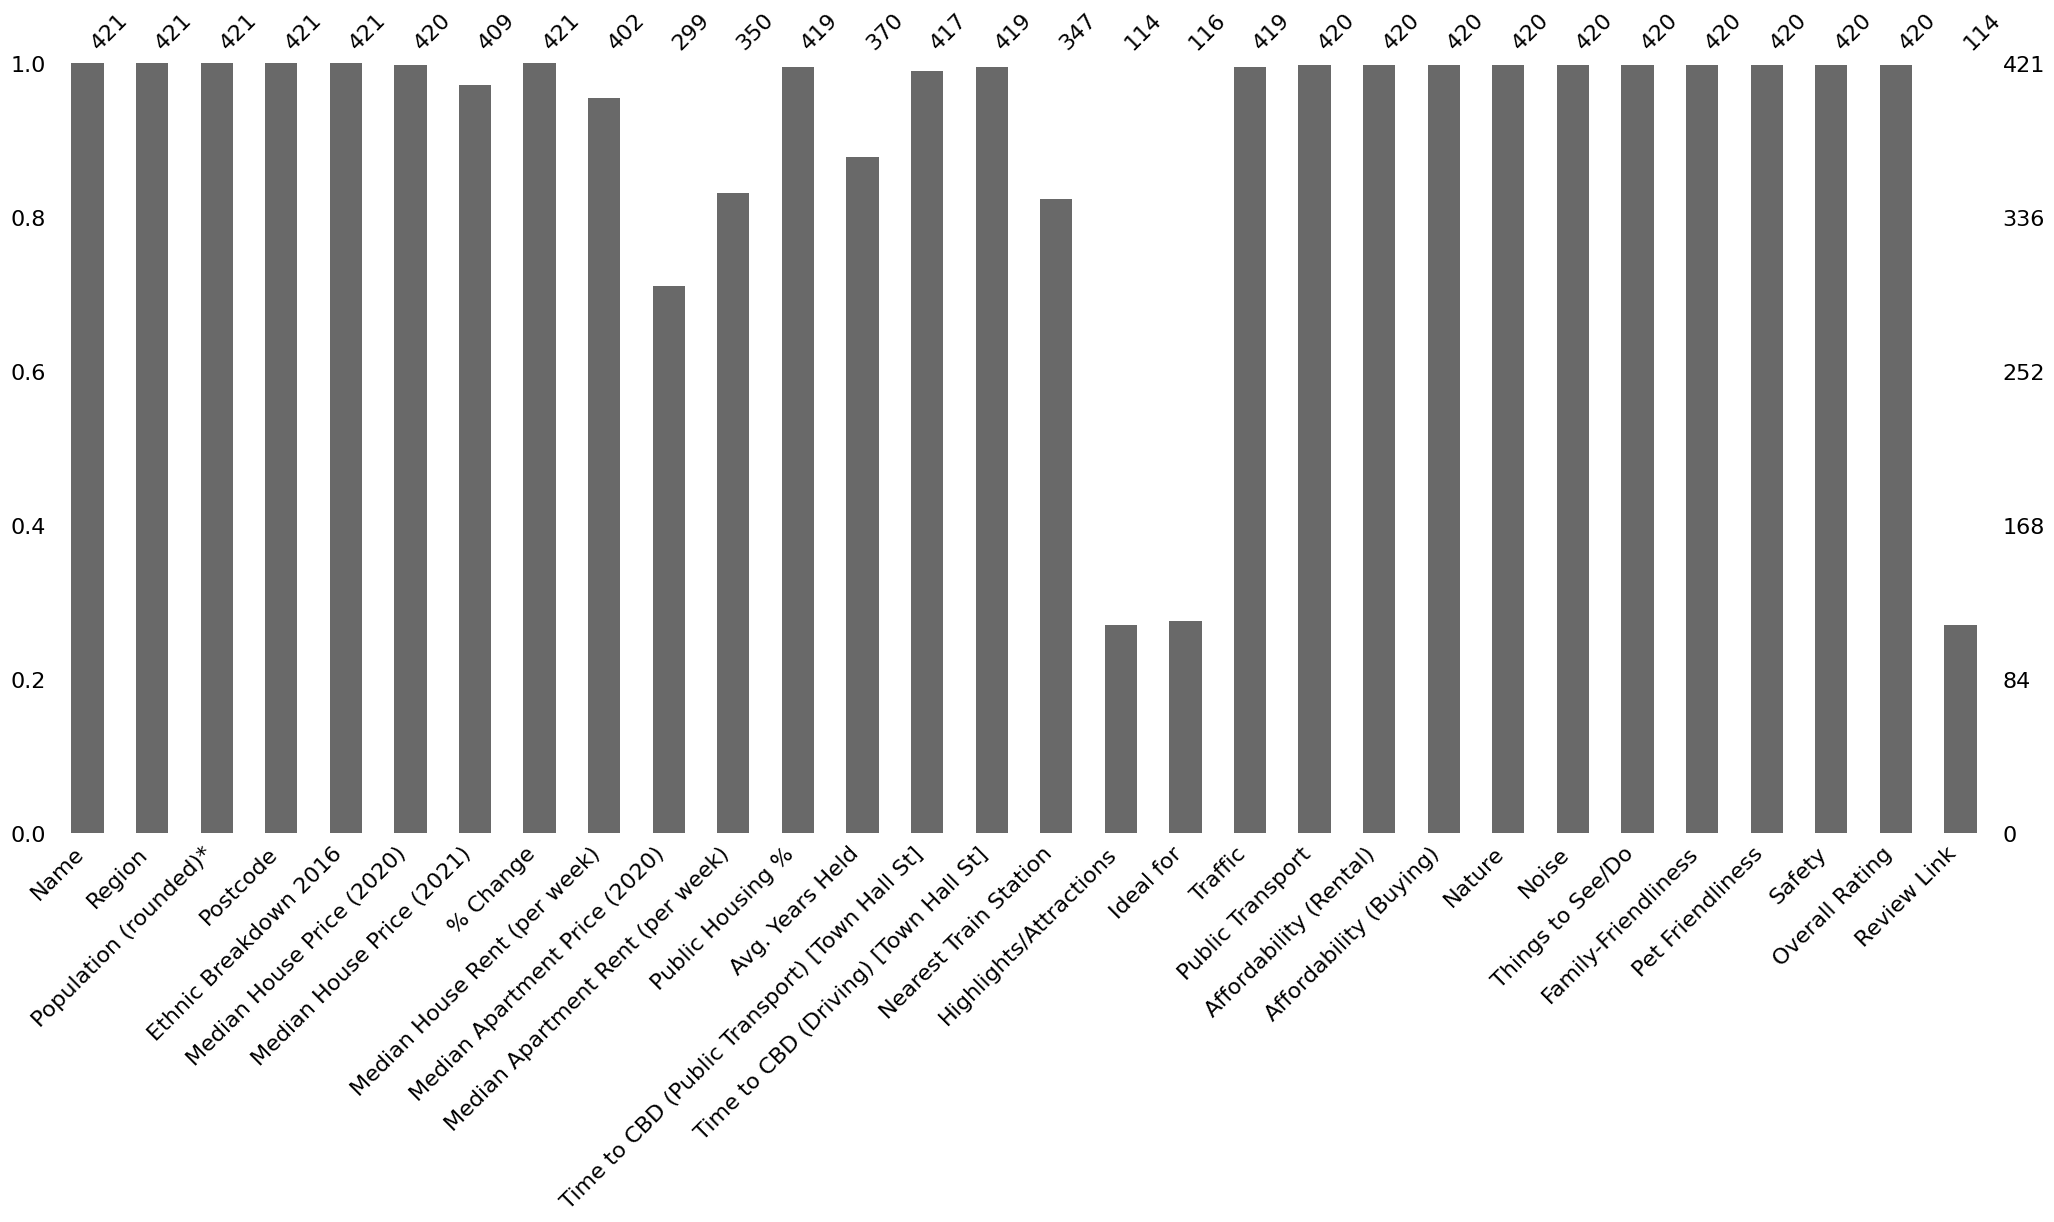

In [ ]:
print('Visualizing missing data')
msno.bar(data_ethnic)

In [ ]:
clean_data_ethnic=data_ethnic.drop(['Population (rounded)*','Avg. Years Held','Median House Price (2020)','Median House Price (2021)','% Change','Median House Rent (per week)','Median Apartment Price (2020)','Median Apartment Rent (per week)','Highlights/Attractions','Time to CBD (Public Transport) [Town Hall St]','Time to CBD (Driving) [Town Hall St]','Public Housing %','Median House Price (2020)','Median House Price (2021)','% Change','Median Apartment Price (2020)','Ideal for','Traffic','Public Transport','Affordability (Rental)','Affordability (Buying)',
            'Nature','Noise','Things to See/Do','Family-Friendliness','Pet Friendliness','Safety','Review Link', 'Overall Rating','Nearest Train Station'], axis=1)
clean_data_ethnic

Name             Region  Postcode  \
0         Hornsby  Upper North Shore      2077   
1          Oatley   Southern Suburbs      2223   
2    Dulwich Hill         Inner West      2203   
3         Jannali   Sutherland Shire      2226   
4        Waverton  Lower North Shore      2060   
..            ...                ...       ...   
416      Kyeemagh   Southern Suburbs      2216   
417     Northwood  Lower North Shore      2066   
418   Watsons Bay    Eastern Suburbs      2030   
419  Lavender Bay  Lower North Shore      2060   
420  Bexley North   Southern Suburbs      2207   

                                 Ethnic Breakdown 2016  
0    Chinese 17.1%, English 16.8%, Australian 14.0%...  
1    English 23.0%, Australian 21.1%, Chinese 9.8%,...  
2    English 19.4%, Australian 16.4%, Irish 9.5%, S...  
3    English 28.2%, Australian 26.3%, Irish 9.8%, S...  
4    English 24.9%, Australian 15.5%, Irish 11.0%, ...  
..                                                 ...  
416  Greek 19.7%, Australian 14.0%, English 10.0%, ...  
417  English 26.4%, Australian 23.0%, Irish 12.3%, ...  
418  English 26.0%, Australian 19.0%, Irish 11.2%, ...  
419  English 25.8%, Australian 15.1%, Irish 13.7%, ...  
420  Greek 17.5%, Chinese 13.3%, Australian 12.0%, ...  

[421 rows x 4 columns]

In [ ]:
type(clean_data_ethnic)

pandas.core.frame.DataFrame

In [ ]:
clean_data_ethnic.rename(columns={'Name':'Suburb', 'Ethnic Breakdown 2016':'Ethnic'}, inplace=True)
cethnic=clean_data_ethnic.copy()
cethnic

Suburb             Region  Postcode  \
0         Hornsby  Upper North Shore      2077   
1          Oatley   Southern Suburbs      2223   
2    Dulwich Hill         Inner West      2203   
3         Jannali   Sutherland Shire      2226   
4        Waverton  Lower North Shore      2060   
..            ...                ...       ...   
416      Kyeemagh   Southern Suburbs      2216   
417     Northwood  Lower North Shore      2066   
418   Watsons Bay    Eastern Suburbs      2030   
419  Lavender Bay  Lower North Shore      2060   
420  Bexley North   Southern Suburbs      2207   

                                                Ethnic  
0    Chinese 17.1%, English 16.8%, Australian 14.0%...  
1    English 23.0%, Australian 21.1%, Chinese 9.8%,...  
2    English 19.4%, Australian 16.4%, Irish 9.5%, S...  
3    English 28.2%, Australian 26.3%, Irish 9.8%, S...  
4    English 24.9%, Australian 15.5%, Irish 11.0%, ...  
..                                                 ...  
416  Greek 19.7%, Australian 14.0%, English 10.0%, ...  
417  English 26.4%, Australian 23.0%, Irish 12.3%, ...  
418  English 26.0%, Australian 19.0%, Irish 11.2%, ...  
419  English 25.8%, Australian 15.1%, Irish 13.7%, ...  
420  Greek 17.5%, Chinese 13.3%, Australian 12.0%, ...  

[421 rows x 4 columns]

In [ ]:
ethic_english=[]
for ethnic in cethnic['Ethnic']:
    num = re.search(r'English'+'\s+(\d*\.\d+|\d+)', ethnic)
    ethic_english.append(str(num))

ethic_australian=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Australian\s+(\d*\.\d+|\d+)', ethinc)
    ethic_australian.append(str(num))

ethic_chinese=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Chinese\s+(\d*\.\d+|\d+)', ethinc)
    ethic_chinese.append(str(num))
ethic_greek=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Greek\s+(\d*\.\d+|\d+)', ethinc)
    ethic_greek.append(str(num))
ethic_irish=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Irish\s+(\d*\.\d+|\d+)', ethinc)
    ethic_irish.append(str(num))
ethic_indian=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Indian\s+(\d*\.\d+|\d+)', ethinc)
    ethic_indian.append(str(num))
ethic_scottish=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Scottish\s+(\d*\.\d+|\d+)', ethinc)
    ethic_scottish.append(str(num))
ethic_italian=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Italian\s+(\d*\.\d+|\d+)', ethinc)
    ethic_italian.append(str(num))
ethic_nepalese=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Nepalese\s+(\d*\.\d+|\d+)', ethinc)
    ethic_nepalese.append(str(num))
ethic_korean=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Korean\s+(\d*\.\d+|\d+)', ethinc)
    ethic_korean.append(str(num))
ethic_lebanese=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Lebanese\s+(\d*\.\d+|\d+)', ethinc)
    ethic_lebanese.append(str(num))
ethic_mongolian=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Mongolian\s+(\d*\.\d+|\d+)', ethinc)
    ethic_mongolian.append(str(num))
ethic_chineseScottish=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'ChineseScottish\s+(\d*\.\d+|\d+)', ethinc)
    ethic_chineseScottish.append(str(num))
ethic_vietnamese=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Vietnamese\s+(\d*\.\d+|\d+)', ethinc)
    ethic_vietnamese.append(str(num))
ethic_thai=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Thai\s+(\d*\.\d+|\d+)', ethinc)
    ethic_thai.append(str(num))
    ethic_filipino=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Filipino\s+(\d*\.\d+|\d+)', ethinc)
    ethic_filipino.append(str(num))

    ethic_turkish=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Turkish\s+(\d*\.\d+|\d+)', ethinc)
    ethic_turkish.append(str(num))
    ethic_iraqi=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Iraqi\s+(\d*\.\d+|\d+)', ethinc)
    ethic_iraqi.append(str(num))
    ethic_maltese=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Maltese\s+(\d*\.\d+|\d+)', ethinc)
    ethic_maltese.append(str(num))
    ethic_khmerCambodian=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'KhmerCambodian\s+(\d*\.\d+|\d+)', ethinc)
    ethic_khmerCambodian.append(str(num))
    ethic_assyrian=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Assyrian\s+(\d*\.\d+|\d+)', ethinc)
    ethic_assyrian.append(str(num))
    ethic_bangladeshi=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Bangladeshi\s+(\d*\.\d+|\d+)', ethinc)
    ethic_bangladeshi.append(str(num))
    ethic_indonesian=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Indonesian\s+(\d*\.\d+|\d+)', ethinc)
    ethic_indonesian.append(str(num))
    ethic_sriLankan=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'SriLankan\s+(\d*\.\d+|\d+)', ethinc)
    ethic_sriLankan.append(str(num))
    ethic_samoan=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Samoan\s+(\d*\.\d+|\d+)', ethinc)
    ethic_samoan.append(str(num))
    ethic_german=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'German\s+(\d*\.\d+|\d+)', ethinc)
    ethic_german.append(str(num))
    ethic_scottishChinese=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'ScottishChinese\s+(\d*\.\d+|\d+)', ethinc)
    ethic_scottishChinese.append(str(num))
    ethic_macedonian=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Macedonian\s+(\d*\.\d+|\d+)', ethinc)
    ethic_macedonian.append(str(num))
    ethic_afghann=[]
for ethinc in cethnic['Ethnic']:
    num = re.search(r'Afghan\s+(\d*\.\d+|\d+)', ethinc)
    ethic_afghann.append(str(num))

In [ ]:
cethnic['English'] = ethic_english
cethnic['Australian'] = ethic_australian
cethnic['Chinese'] = ethic_chinese
cethnic['Greek'] = ethic_greek
cethnic['Irish'] = ethic_irish
cethnic['Indian'] = ethic_indian

cethnic['Scottish']=ethic_scottish

cethnic['Italian']=ethic_italian

cethnic['Nepalese']=ethic_nepalese

cethnic['Korean']=ethic_korean

cethnic['Lebanese']=ethic_lebanese

cethnic['Mongolian']=ethic_mongolian

cethnic['ChineseScottish']=ethic_chineseScottish

cethnic['Vietnamese']=ethic_vietnamese

cethnic['Thai']=ethic_thai

cethnic['Filipino']=   ethic_filipino


cethnic['Turkish']=    ethic_turkish

cethnic['Iraqi']=    ethic_iraqi

cethnic['Maltese']=    ethic_maltese

cethnic['KhmerCambodian']=    ethic_khmerCambodian

cethnic['Assyrian']=    ethic_assyrian

cethnic['Bangladeshi']=    ethic_bangladeshi

cethnic['Indonesian']=    ethic_indonesian

cethnic['SriLankan']=    ethic_sriLankan

cethnic['Samoan']=    ethic_samoan

cethnic['German']=    ethic_german

cethnic['ScottishChinese']=    ethic_scottishChinese

cethnic['Macedonian']=    ethic_macedonian

cethnic['Afghan']=    ethic_afghann

cethnic

Suburb             Region  Postcode  \
0         Hornsby  Upper North Shore      2077   
1          Oatley   Southern Suburbs      2223   
2    Dulwich Hill         Inner West      2203   
3         Jannali   Sutherland Shire      2226   
4        Waverton  Lower North Shore      2060   
..            ...                ...       ...   
416      Kyeemagh   Southern Suburbs      2216   
417     Northwood  Lower North Shore      2066   
418   Watsons Bay    Eastern Suburbs      2030   
419  Lavender Bay  Lower North Shore      2060   
420  Bexley North   Southern Suburbs      2207   

                                                Ethnic  \
0    Chinese 17.1%, English 16.8%, Australian 14.0%...   
1    English 23.0%, Australian 21.1%, Chinese 9.8%,...   
2    English 19.4%, Australian 16.4%, Irish 9.5%, S...   
3    English 28.2%, Australian 26.3%, Irish 9.8%, S...   
4    English 24.9%, Australian 15.5%, Irish 11.0%, ...   
..                                                 ...   
416  Greek 19.7%, Australian 14.0%, English 10.0%, ...   
417  English 26.4%, Australian 23.0%, Irish 12.3%, ...   
418  English 26.0%, Australian 19.0%, Irish 11.2%, ...   
419  English 25.8%, Australian 15.1%, Irish 13.7%, ...   
420  Greek 17.5%, Chinese 13.3%, Australian 12.0%, ...   

                                               English  \
0    <re.Match object; span=(15, 27), match='Englis...   
1    <re.Match object; span=(0, 12), match='English...   
2    <re.Match object; span=(0, 12), match='English...   
3    <re.Match object; span=(0, 12), match='English...   
4    <re.Match object; span=(0, 12), match='English...   
..                                                 ...   
416  <re.Match object; span=(31, 43), match='Englis...   
417  <re.Match object; span=(0, 12), match='English...   
418  <re.Match object; span=(0, 12), match='English...   
419  <re.Match object; span=(0, 12), match='English...   
420  <re.Match object; span=(46, 58), match='Englis...   

                                            Australian  \
0    <re.Match object; span=(30, 45), match='Austra...   
1    <re.Match object; span=(15, 30), match='Austra...   
2    <re.Match object; span=(15, 30), match='Austra...   
3    <re.Match object; span=(15, 30), match='Austra...   
4    <re.Match object; span=(15, 30), match='Austra...   
..                                                 ...   
416  <re.Match object; span=(13, 28), match='Austra...   
417  <re.Match object; span=(15, 30), match='Austra...   
418  <re.Match object; span=(15, 30), match='Austra...   
419  <re.Match object; span=(15, 30), match='Austra...   
420  <re.Match object; span=(28, 43), match='Austra...   

                                               Chinese  \
0    <re.Match object; span=(0, 12), match='Chinese...   
1    <re.Match object; span=(33, 44), match='Chines...   
2                                                 None   
3    <re.Match object; span=(60, 71), match='Chines...   
4    <re.Match object; span=(46, 57), match='Chines...   
..                                                 ...   
416                                               None   
417  <re.Match object; span=(61, 72), match='Chines...   
418                                               None   
419  <re.Match object; span=(61, 72), match='Chines...   
420  <re.Match object; span=(13, 25), match='Chines...   

                                                 Greek  \
0                                                 None   
1                                                 None   
2    <re.Match object; span=(60, 69), match='Greek ...   
3                                                 None   
4                                                 None   
..                                                 ...   
416  <re.Match object; span=(0, 10), match='Greek 1...   
417                                               None   
418                                               None   
419                                       

In [ ]:
cethnic['English'] = cethnic['English'].str[-6:-2]
cethnic['Australian'] = cethnic['Australian'].str[-6:-2]
cethnic['Chinese'] = cethnic['Chinese'].str[-6:-2]
cethnic['Greek'] = cethnic['Greek'] .str[-6:-2]
cethnic['Irish'] = cethnic['Irish'].str[-6:-2]
cethnic['Indian'] = cethnic['Indian'].str[-6:-2]
cethnic['Scottish']=cethnic['Scottish'].str[-6:-2]

cethnic['Italian']=cethnic['Italian'].str[-6:-2]

cethnic['Nepalese']=cethnic['Nepalese'].str[-6:-2]

cethnic['Korean']=cethnic['Korean'].str[-6:-2]

cethnic['Lebanese']=cethnic['Lebanese'].str[-6:-2]

cethnic['Mongolian']=cethnic['Mongolian'].str[-6:-2]

cethnic['ChineseScottish']=cethnic['ChineseScottish'].str[-6:-2]

cethnic['Vietnamese']=cethnic['Vietnamese'].str[-6:-2]

cethnic['Thai']=cethnic['Thai'].str[-6:-2]

cethnic['Filipino']=cethnic['Filipino'].str[-6:-2]


cethnic['Turkish']=cethnic['Turkish'].str[-6:-2]

cethnic['Iraqi']=cethnic['Iraqi'].str[-6:-2]

cethnic['Maltese']=cethnic['Maltese'].str[-6:-2]

cethnic['KhmerCambodian']= cethnic['KhmerCambodian'].str[-6:-2]

cethnic['Assyrian']=cethnic['Assyrian'].str[-6:-2]

cethnic['Bangladeshi']=cethnic['Bangladeshi'].str[-6:-2]

cethnic['Indonesian']=cethnic['Indonesian'].str[-6:-2]

cethnic['SriLankan']=cethnic['SriLankan'].str[-6:-2]

cethnic['Samoan']=cethnic['Samoan'].str[-6:-2]

cethnic['German']=cethnic['German'].str[-6:-2]

cethnic['ScottishChinese']=cethnic['ScottishChinese'].str[-6:-2]
cethnic['Macedonian']=cethnic['Macedonian'].str[-6:-2]

cethnic['Afghan']=cethnic['Afghan'].str[-6:-2]
cethnic

Suburb             Region  Postcode  \
0         Hornsby  Upper North Shore      2077   
1          Oatley   Southern Suburbs      2223   
2    Dulwich Hill         Inner West      2203   
3         Jannali   Sutherland Shire      2226   
4        Waverton  Lower North Shore      2060   
..            ...                ...       ...   
416      Kyeemagh   Southern Suburbs      2216   
417     Northwood  Lower North Shore      2066   
418   Watsons Bay    Eastern Suburbs      2030   
419  Lavender Bay  Lower North Shore      2060   
420  Bexley North   Southern Suburbs      2207   

                                                Ethnic English Australian  \
0    Chinese 17.1%, English 16.8%, Australian 14.0%...    16.8       14.0   
1    English 23.0%, Australian 21.1%, Chinese 9.8%,...    23.0       21.1   
2    English 19.4%, Australian 16.4%, Irish 9.5%, S...    19.4       16.4   
3    English 28.2%, Australian 26.3%, Irish 9.8%, S...    28.2       26.3   
4    English 24.9%, Australian 15.5%, Irish 11.0%, ...    24.9       15.5   
..                                                 ...     ...        ...   
416  Greek 19.7%, Australian 14.0%, English 10.0%, ...    10.0       14.0   
417  English 26.4%, Australian 23.0%, Irish 12.3%, ...    26.4       23.0   
418  English 26.0%, Australian 19.0%, Irish 11.2%, ...    26.0       19.0   
419  English 25.8%, Australian 15.1%, Irish 13.7%, ...    25.8       15.1   
420  Greek 17.5%, Chinese 13.3%, Australian 12.0%, ...    10.6       12.0   

    Chinese Greek Irish Indian  ... KhmerCambodian Assyrian Bangladeshi  \
0      17.1    No   5.6    5.9  ...             No       No          No   
1       9.8    No   8.9     No  ...             No       No          No   
2        No   5.2   9.5     No  ...             No       No          No   
3       3.0    No   9.8     No  ...             No       No          No   
4       8.4    No  11.0     No  ...             No       No          No   
..      ...   ...   ...    ...  ...            ...      ...         ...   
416      No  19.7    No     No  ...             No       No          No   
417     7.0    No  12.3     No  ...             No       No          No   
418      No    No  11.2     No  ...             No       No          No   
419     4.5    No  13.7     No  ...             No       No          No   
420    13.3  17.5    No     No  ...             No       No          No   

    Indonesian SriLankan Samoan German ScottishChinese Macedonian Afghan  
0           No        No     No     No              No         No     No  
1           No        No     No     No              No         No     No  
2           No        No     No     No              No         No     No  
3           No        No     No     No              No         No     No  
4           No        No     No     No              No         No     No  
..         ...       ...    ...    ...             ...        ...    ...  
416         No        No     No     No              No         No     No  
417         No        No     No     No              No         No     No  
418         No        No     No    3.9              No         No     No  
419         No        No     No     No              No         No     No  
420         No        No     No     No              No         No     No  

[421 rows x 33 columns]

In [ ]:
cethnic['English'] = cethnic['English'].apply(pd.to_numeric,errors='coerce')
cethnic['Australian'] = cethnic['Australian'].apply(pd.to_numeric,errors='coerce')
cethnic['Chinese'] = cethnic['Chinese'].apply(pd.to_numeric,errors='coerce')
cethnic['Greek'] = cethnic['Greek'].apply(pd.to_numeric,errors='coerce')
cethnic['Irish'] = cethnic['Irish'].apply(pd.to_numeric,errors='coerce')
cethnic['Indian'] = cethnic['Indian'].apply(pd.to_numeric,errors='coerce')
cethnic['Scottish']=cethnic['Scottish'].apply(pd.to_numeric,errors='coerce')

cethnic['Italian']=cethnic['Italian'].apply(pd.to_numeric,errors='coerce')

cethnic['Nepalese']=cethnic['Nepalese'].apply(pd.to_numeric,errors='coerce')

cethnic['Korean']=cethnic['Korean'].apply(pd.to_numeric,errors='coerce')

cethnic['Lebanese']=cethnic['Lebanese'].apply(pd.to_numeric,errors='coerce')

cethnic['Mongolian']=cethnic['Mongolian'].apply(pd.to_numeric,errors='coerce')

cethnic['ChineseScottish']=cethnic['ChineseScottish'].apply(pd.to_numeric,errors='coerce')

cethnic['Vietnamese']=cethnic['Vietnamese'].apply(pd.to_numeric,errors='coerce')

cethnic['Thai']=cethnic['Thai'].apply(pd.to_numeric,errors='coerce')

cethnic['Filipino']=cethnic['Filipino'].apply(pd.to_numeric,errors='coerce')


cethnic['Turkish']=cethnic['Turkish'].apply(pd.to_numeric,errors='coerce')

cethnic['Iraqi']=cethnic['Iraqi'].apply(pd.to_numeric,errors='coerce')

cethnic['Maltese']=cethnic['Maltese'].apply(pd.to_numeric,errors='coerce')

cethnic['KhmerCambodian']= cethnic['KhmerCambodian'].apply(pd.to_numeric,errors='coerce')

cethnic['Assyrian']=cethnic['Assyrian'].apply(pd.to_numeric,errors='coerce')

cethnic['Bangladeshi']=cethnic['Bangladeshi'].apply(pd.to_numeric,errors='coerce')

cethnic['Indonesian']=cethnic['Indonesian'].apply(pd.to_numeric,errors='coerce')

cethnic['SriLankan']=cethnic['SriLankan'].apply(pd.to_numeric,errors='coerce')

cethnic['Samoan']=cethnic['Samoan'].apply(pd.to_numeric,errors='coerce')

cethnic['German']=cethnic['German'].apply(pd.to_numeric,errors='coerce')

cethnic['ScottishChinese']=cethnic['ScottishChinese'].apply(pd.to_numeric,errors='coerce')
cethnic['Macedonian']=cethnic['Macedonian'].apply(pd.to_numeric,errors='coerce')

cethnic['Afghan']=cethnic['Afghan'].apply(pd.to_numeric,errors='coerce')
#cethnic=cethnic.convert_dtypes()
cethnic.info()
cethnic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           421 non-null    object 
 1   Region           421 non-null    object 
 2   Postcode         421 non-null    int64  
 3   Ethnic           421 non-null    object 
 4   English          417 non-null    float64
 5   Australian       419 non-null    float64
 6   Chinese          235 non-null    float64
 7   Greek            42 non-null     float64
 8   Irish            316 non-null    float64
 9   Indian           72 non-null     float64
 10  Scottish         241 non-null    float64
 11  Italian          103 non-null    float64
 12  Nepalese         8 non-null      float64
 13  Korean           20 non-null     float64
 14  Lebanese         61 non-null     float64
 15  Mongolian        1 non-null      float64
 16  ChineseScottish  0 non-null      float64
 17  Vietnamese      

Suburb             Region  Postcode  \
0         Hornsby  Upper North Shore      2077   
1          Oatley   Southern Suburbs      2223   
2    Dulwich Hill         Inner West      2203   
3         Jannali   Sutherland Shire      2226   
4        Waverton  Lower North Shore      2060   
..            ...                ...       ...   
416      Kyeemagh   Southern Suburbs      2216   
417     Northwood  Lower North Shore      2066   
418   Watsons Bay    Eastern Suburbs      2030   
419  Lavender Bay  Lower North Shore      2060   
420  Bexley North   Southern Suburbs      2207   

                                                Ethnic  English  Australian  \
0    Chinese 17.1%, English 16.8%, Australian 14.0%...     16.8        14.0   
1    English 23.0%, Australian 21.1%, Chinese 9.8%,...     23.0        21.1   
2    English 19.4%, Australian 16.4%, Irish 9.5%, S...     19.4        16.4   
3    English 28.2%, Australian 26.3%, Irish 9.8%, S...     28.2        26.3   
4    English 24.9%, Australian 15.5%, Irish 11.0%, ...     24.9        15.5   
..                                                 ...      ...         ...   
416  Greek 19.7%, Australian 14.0%, English 10.0%, ...     10.0        14.0   
417  English 26.4%, Australian 23.0%, Irish 12.3%, ...     26.4        23.0   
418  English 26.0%, Australian 19.0%, Irish 11.2%, ...     26.0        19.0   
419  English 25.8%, Australian 15.1%, Irish 13.7%, ...     25.8        15.1   
420  Greek 17.5%, Chinese 13.3%, Australian 12.0%, ...     10.6        12.0   

     Chinese  Greek  Irish  Indian  ...  KhmerCambodian  Assyrian  \
0       17.1    NaN    5.6     5.9  ...             NaN       NaN   
1        9.8    NaN    8.9     NaN  ...             NaN       NaN   
2        NaN    5.2    9.5     NaN  ...             NaN       NaN   
3        3.0    NaN    9.8     NaN  ...             NaN       NaN   
4        8.4    NaN   11.0     NaN  ...             NaN       NaN   
..       ...    ...    ...     ...  ...             ...       ...   
416      NaN   19.7    NaN     NaN  ...             NaN       NaN   
417      7.0    NaN   12.3     NaN  ...             NaN       NaN   
418      NaN    NaN   11.2     NaN  ...             NaN       NaN   
419      4.5    NaN   13.7     NaN  ...             NaN       NaN   
420     13.3   17.5    NaN     NaN  ...             NaN       NaN   

     Bangladeshi  Indonesian  SriLankan  Samoan  German  ScottishChinese  \
0            NaN         NaN        NaN     NaN     NaN              NaN   
1            NaN         NaN        NaN     NaN     NaN              NaN   
2            NaN         NaN        NaN     NaN     NaN              NaN   
3            NaN         NaN        NaN     NaN     NaN              NaN   
4            NaN         NaN        NaN     NaN     NaN              NaN   
..           ...         ...        ...     ...     ...              ...   
416          NaN         NaN        NaN     NaN     NaN              NaN   
417          NaN         NaN        NaN     NaN     NaN              NaN   
418          NaN         NaN        NaN     NaN     3.9              NaN   
419          NaN         NaN        NaN     NaN     NaN              NaN   
420          NaN         NaN        NaN     NaN     NaN              NaN   

     Macedonian  Afghan  
0           NaN     NaN  
1           NaN     NaN  
2           NaN     NaN  
3           NaN     NaN  
4           NaN     NaN  
..          ...     ...  
416         NaN     NaN  
417         NaN     NaN  
418         NaN     NaN  
419         NaN     NaN  
420         NaN     NaN  

[421 rows x 33 columns]

In [ ]:
data_ethnic_clean=cethnic.drop(['Ethnic'],axis='columns')
data_ethnic_clean.head()

Suburb             Region  Postcode  English  Australian  Chinese  \
0       Hornsby  Upper North Shore      2077     16.8        14.0     17.1   
1        Oatley   Southern Suburbs      2223     23.0        21.1      9.8   
2  Dulwich Hill         Inner West      2203     19.4        16.4      NaN   
3       Jannali   Sutherland Shire      2226     28.2        26.3      3.0   
4      Waverton  Lower North Shore      2060     24.9        15.5      8.4   

   Greek  Irish  Indian  Scottish  ...  KhmerCambodian  Assyrian  Bangladeshi  \
0    NaN    5.6     5.9       NaN  ...             NaN       NaN          NaN   
1    NaN    8.9     NaN       5.7  ...             NaN       NaN          NaN   
2    5.2    9.5     NaN       6.2  ...             NaN       NaN          NaN   
3    NaN    9.8     NaN       6.5  ...             NaN       NaN          NaN   
4    NaN   11.0     NaN       8.1  ...             NaN       NaN          NaN   

   Indonesian  SriLankan  Samoan  German  ScottishChinese  Macedonian  Afghan  
0         NaN        NaN     NaN     NaN              NaN         NaN     NaN  
1         NaN        NaN     NaN     NaN              NaN         NaN     NaN  
2         NaN        NaN     NaN     NaN              NaN         NaN     NaN  
3         NaN        NaN     NaN     NaN              NaN         NaN     NaN  
4         NaN        NaN     NaN     NaN              NaN         NaN     NaN  

[5 rows x 32 columns]

In [ ]:
dup_ethnic = cethnic.duplicated()
print('Number of duplicate rows = %d' % (dup_ethnic.sum()))

Number of duplicate rows = 0


In [ ]:
dups = data_price.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data_price.loc[[0,100]]

Number of duplicate rows = 0


price date_sold       suburb  num_bath  num_bed  num_parking  \
0     530000   13/1/16    Kincumber         4        4            2   
100  3100000   27/2/16  Point Clare         4        6            2   

     property_size   type  suburb_population  suburb_median_income  \
0             1351  House               7093                 29432   
100           2245  House               3731                 31772   

     suburb_sqkm  suburb_lat  suburb_lng  suburb_elevation  cash_rate  \
0          9.914   -33.47252   151.40208                24        2.0   
100        3.336   -33.44017   151.31715                62        2.0   

     property_inflation_index  km_from_cbd  
0                       150.9        47.05  
100                     150.9        48.17

In [ ]:
data_merge = data_price.merge(data_ethnic_clean[:], left_on='suburb',
                  right_on='Suburb').drop('Suburb', axis='columns')
data_merge

price date_sold         suburb  num_bath  num_bed  num_parking  \
0      452000   13/1/16        Leumeah         1        3            1   
1      495000   15/1/16        Leumeah         1        3            2   
2      473000   19/1/16        Leumeah         1        3            3   
3      520000   20/1/16        Leumeah         1        3            1   
4      585000   22/9/17        Leumeah         1        3            1   
...       ...       ...            ...       ...      ...          ...   
7106  1900000  16/11/21  Milsons Point         2        2            1   
7107  1000000  21/11/21  Eastern Creek         2        5            4   
7108  1065000  13/12/21  Eastern Creek         3        3            2   
7109  1000000  13/12/21  Eastern Creek         2        4            2   
7110  1115000  15/12/21        Sadleir         2        4            2   

      property_size                     type  suburb_population  \
0               344                    House               9835   
1               582                    House               9835   
2               581                    House               9835   
3               651                    House               9835   
4               436                    House               9835   
...             ...                      ...                ...   
7106            124  Apartment / Unit / Flat               2158   
7107            601                    House                827   
7108            949                    House                827   
7109            910                    House                827   
7110            639                    House               3135   

      suburb_median_income  ...  KhmerCambodian  Assyrian  Bangladeshi  \
0                    32292  ...             NaN       NaN          NaN   
1                    32292  ...             NaN       NaN          NaN   
2                    32292  ...             NaN       NaN          NaN   
3                    32292  ...             NaN       NaN          NaN   
4                    32292  ...             NaN       NaN          NaN   
...                    ...  ...             ...       ...          ...   
7106                 87360  ...             NaN       NaN          NaN   
7107                 33852  ...             NaN       NaN          NaN   
7108                 33852  ...             NaN       NaN          NaN   
7109                 33852  ...             NaN       NaN          NaN   
7110                 21060  ...             NaN       NaN          NaN   

      Indonesian  SriLankan  Samoan  German ScottishChinese  Macedonian  \
0            NaN        NaN     NaN     NaN             NaN         NaN   
1            NaN        NaN     NaN     NaN             NaN         NaN   
2            NaN        NaN     NaN     NaN             NaN         NaN   
3            NaN        NaN     NaN     NaN             NaN         NaN   
4            NaN        NaN     NaN     NaN             NaN         NaN   
...          ...        ...     ...     ...             ...         ...   
7106         NaN        NaN     NaN     NaN             NaN         NaN   
7107         NaN        NaN     NaN     NaN             NaN         NaN   
7108         NaN        NaN     NaN     NaN             NaN         NaN   
7109         NaN        NaN     NaN     NaN             NaN         NaN   
7110         NaN        NaN     NaN     NaN             NaN         NaN   

      Afghan  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
7106     NaN  
7107     NaN  
7108     NaN  
7109     NaN  
7110     NaN  

[7111 rows x 48 columns]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data_merge.drop(['Region','Postcode'],axis=1)

price date_sold         suburb  num_bath  num_bed  num_parking  \
0      452000   13/1/16        Leumeah         1        3            1   
1      495000   15/1/16        Leumeah         1        3            2   
2      473000   19/1/16        Leumeah         1        3            3   
3      520000   20/1/16        Leumeah         1        3            1   
4      585000   22/9/17        Leumeah         1        3            1   
...       ...       ...            ...       ...      ...          ...   
7106  1900000  16/11/21  Milsons Point         2        2            1   
7107  1000000  21/11/21  Eastern Creek         2        5            4   
7108  1065000  13/12/21  Eastern Creek         3        3            2   
7109  1000000  13/12/21  Eastern Creek         2        4            2   
7110  1115000  15/12/21        Sadleir         2        4            2   

      property_size                     type  suburb_population  \
0               344                    House               9835   
1               582                    House               9835   
2               581                    House               9835   
3               651                    House               9835   
4               436                    House               9835   
...             ...                      ...                ...   
7106            124  Apartment / Unit / Flat               2158   
7107            601                    House                827   
7108            949                    House                827   
7109            910                    House                827   
7110            639                    House               3135   

      suburb_median_income  suburb_sqkm  suburb_lat  suburb_lng  \
0                    32292        4.055   -34.05375   150.83957   
1                    32292        4.055   -34.05375   150.83957   
2                    32292        4.055   -34.05375   150.83957   
3                    32292        4.055   -34.05375   150.83957   
4                    32292        4.055   -34.05375   150.83957   
...                    ...          ...         ...         ...   
7106                 87360        0.198   -33.84723   151.21163   
7107                 33852       20.431   -33.79734   150.84976   
7108                 33852       20.431   -33.79734   150.84976   
7109                 33852       20.431   -33.79734   150.84976   
7110                 21060        0.899   -33.91680   150.89054   

      suburb_elevation  cash_rate  property_inflation_index  km_from_cbd  \
0                   81        2.0                     150.9        40.12   
1                   81        2.0                     150.9        40.12   
2                   81        2.0                     150.9        40.12   
3                   81        2.0                     150.9        40.12   
4                   81        1.5                     174.0        40.12   
...                ...        ...                       ...          ...   
7106                42        0.1                     220.1         1.99   
7107                63        0.1                     220.1        34.17   
7108                63        0.1                     220.1        34.17   
7109                63        0.1                     220.1        34.17   
7110                25        0.1                     220.1        30.09   

      English  Australian  Chinese  Greek  Irish  Indian  Scottish  Italian  \
0        22.7        23.0      NaN    NaN    6.8     3.4       5.6      NaN   
1        22.7        23.0      NaN    NaN    6.8     3.4       5.6      NaN   
2        22.7        23.0      NaN    NaN    6.8     3.4       5.6      NaN   
3        22.7        23.0      NaN    NaN    6.8     3.4       5.6      NaN   
4        22.7        23.0      NaN    NaN    6.8     3.4       5.6      NaN   
...       ...         ...      ...    ...    ...     ...       ...      ...   
7106     20.3         9.7     15.8    NaN  

In [ ]:
data_merge = data_merge.fillna(0)
data_merge

price date_sold         suburb  num_bath  num_bed  num_parking  \
0      452000   13/1/16        Leumeah         1        3            1   
1      495000   15/1/16        Leumeah         1        3            2   
2      473000   19/1/16        Leumeah         1        3            3   
3      520000   20/1/16        Leumeah         1        3            1   
4      585000   22/9/17        Leumeah         1        3            1   
...       ...       ...            ...       ...      ...          ...   
7106  1900000  16/11/21  Milsons Point         2        2            1   
7107  1000000  21/11/21  Eastern Creek         2        5            4   
7108  1065000  13/12/21  Eastern Creek         3        3            2   
7109  1000000  13/12/21  Eastern Creek         2        4            2   
7110  1115000  15/12/21        Sadleir         2        4            2   

      property_size                     type  suburb_population  \
0               344                    House               9835   
1               582                    House               9835   
2               581                    House               9835   
3               651                    House               9835   
4               436                    House               9835   
...             ...                      ...                ...   
7106            124  Apartment / Unit / Flat               2158   
7107            601                    House                827   
7108            949                    House                827   
7109            910                    House                827   
7110            639                    House               3135   

      suburb_median_income  suburb_sqkm  suburb_lat  suburb_lng  \
0                    32292        4.055   -34.05375   150.83957   
1                    32292        4.055   -34.05375   150.83957   
2                    32292        4.055   -34.05375   150.83957   
3                    32292        4.055   -34.05375   150.83957   
4                    32292        4.055   -34.05375   150.83957   
...                    ...          ...         ...         ...   
7106                 87360        0.198   -33.84723   151.21163   
7107                 33852       20.431   -33.79734   150.84976   
7108                 33852       20.431   -33.79734   150.84976   
7109                 33852       20.431   -33.79734   150.84976   
7110                 21060        0.899   -33.91680   150.89054   

      suburb_elevation  cash_rate  property_inflation_index  km_from_cbd  \
0                   81        2.0                     150.9        40.12   
1                   81        2.0                     150.9        40.12   
2                   81        2.0                     150.9        40.12   
3                   81        2.0                     150.9        40.12   
4                   81        1.5                     174.0        40.12   
...                ...        ...                       ...          ...   
7106                42        0.1                     220.1         1.99   
7107                63        0.1                     220.1        34.17   
7108                63        0.1                     220.1        34.17   
7109                63        0.1                     220.1        34.17   
7110                25        0.1                     220.1        30.09   

                 Region  Postcode  English  Australian  Chinese  Greek  Irish  \
0            South West      2560     22.7        23.0      0.0    0.0    6.8   
1            South West      2560     22.7        23.0      0.0    0.0    6.8   
2            South West      2560     22.7        23.0      0.0    0.0    6.8   
3            South West      2560     22.7        23.0      0.0    0.0    6.8   
4            South West      2560     22.7        23.0      0.0    0.0    6.8   
...                 ...       ...      ...         ...      ...    ...    ...   
7106  Lower North Shore      

In [ ]:
data_price[(data_price['num_bath']==0) | (data_price['num_bed']==0)]

price date_sold         suburb  num_bath  num_bed  num_parking  \
4       365500   13/1/16    North Avoca         0        0            0   
9       242500   15/1/16       Winmalee         0        0            0   
67      320000   17/2/16     Rosemeadow         0        0            0   
99      225000   26/2/16  Chittaway Bay         0        1            0   
154     600000   21/3/16      Kingswood         0        0            0   
...        ...       ...            ...       ...      ...          ...   
11068  1380000  22/12/21      Caringbah         0        3            1   
11081  1100000  22/12/21  Glenmore Park         0        5            3   
11091   891000  22/12/21      Glenfield         0        3            1   
11092   670000  22/12/21        Carlton         0        2            1   
11104  1600000  23/12/21     Kellyville         0        0            0   

       property_size                     type  suburb_population  \
4               1850              Vacant land               2200   
9               1248              Vacant land               6202   
67               592              Vacant land               7862   
99               486              Vacant land               2028   
154              871              Vacant land               9301   
...              ...                      ...                ...   
11068            210                Townhouse              11658   
11081            540                    House              23004   
11091            605                    House               9633   
11092            109  Apartment / Unit / Flat              10722   
11104            542              Vacant land              27971   

       suburb_median_income  suburb_sqkm  suburb_lat  suburb_lng  \
4                     45084        1.497   -33.45608   151.43598   
9                     38740        9.058   -33.67971   150.61119   
67                    32864        2.976   -34.10624   150.79181   
99                    31668        1.116   -33.32678   151.44557   
154                   33228        4.782   -33.76129   150.72784   
...                     ...          ...         ...         ...   
11068                 42380        4.089   -34.03534   151.12423   
11081                 45916        9.740   -33.79317   150.68049   
11091                 37024        6.995   -33.97099   150.89301   
11092                 32656        2.065   -33.97075   151.12140   
11104                 46228       18.645   -33.69583   150.95622   

       suburb_elevation  cash_rate  property_inflation_index  km_from_cbd  
4                    18        2.0                     150.9        49.98  
9                   263        2.0                     150.9        59.15  
67                  149        2.0                     150.9        46.98  
99                    3        2.0                     150.9        63.59  
154                  42        2.0                     155.2        46.09  
...                 ...        ...                       ...          ...  
11068                22        0.1                     220.1        20.47  
11081                54        0.1                     220.1        49.65  
11091                29        0.1                     220.1        31.57  
11092                36        0.1                     220.1        14.29  
11104                78        0.1                     220.1        30.08  

[205 rows x 17 columns]

In [ ]:
data_merge['date_sold'] = pd.to_datetime(data_merge['date_sold'])

<ipython-input-30-23df890280c6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_merge['date_sold'] = pd.to_datetime(data_merge['date_sold'])


In [ ]:
test= data_merge.drop_duplicates(subset=["suburb"],keep='first')
test

price  date_sold         suburb  num_bath  num_bed  num_parking  \
0      452000 2016-01-13        Leumeah         1        3            1   
22     890000 2016-01-18   Picnic Point         2        4            3   
55     533000 2016-01-18         Whalan         3        4            2   
56    1120500 2016-01-19    North Rocks         2        4            2   
86     675000 2016-01-19      Bass Hill         3        3            2   
...       ...        ...            ...       ...      ...          ...   
7101  1320000 2021-10-19       Narellan         2        4            2   
7104  1035501 2021-06-11         Kearns         3        5            2   
7106  1900000 2021-11-16  Milsons Point         2        2            1   
7107  1000000 2021-11-21  Eastern Creek         2        5            4   
7110  1115000 2021-12-15        Sadleir         2        4            2   

      property_size                     type  suburb_population  \
0               344                    House               9835   
22              715                    House               6160   
55              695                    House               5973   
56              904                    House               7965   
86              263                Townhouse               9069   
...             ...                      ...                ...   
7101            633                    House               3616   
7104            963                    House               2745   
7106            124  Apartment / Unit / Flat               2158   
7107            601                    House                827   
7110            639                    House               3135   

      suburb_median_income  suburb_sqkm  suburb_lat  suburb_lng  \
0                    32292        4.055   -34.05375   150.83957   
22                   40560        3.859   -33.97301   151.00632   
55                   24180        2.429   -33.75572   150.80361   
56                   40092        5.462   -33.77572   151.01474   
86                   24388        2.929   -33.90028   150.99309   
...                    ...          ...         ...         ...   
7101                 35516        4.276   -34.04378   150.73456   
7104                 40092        2.359   -34.01979   150.80135   
7106                 87360        0.198   -33.84723   151.21163   
7107                 33852       20.431   -33.79734   150.84976   
7110                 21060        0.899   -33.91680   150.89054   

      suburb_elevation  cash_rate  property_inflation_index  km_from_cbd  \
0                   81        2.0                     150.9        40.12   
22                  33        2.0                     150.9        22.31   
55                  37        2.0                     150.9        39.53   
56                  92        2.0                     150.9        20.61   
86                  40        2.0                     150.9        20.43   
...                ...        ...                       ...          ...   
7101                91        0.1                     220.1        48.20   
7104                87        0.1                     210.1        41.48   
7106                42        0.1                     220.1         1.99   
7107                63        0.1                     220.1        34.17   
7110                25        0.1                     220.1        30.09   

                 Region  Postcode  English  Australian  Chinese  Greek  Irish  \
0            South West      2560     22.7        23.0      0.0    0.0    6.8   
22      Western Suburbs      2213     20.7        23.1      0.0    4.9    8.2   
55      Western Suburbs      2770     21.6        24.9      0.0    0.0    4.7   
56          Hills Shire      2151     20.1        19.4     14.9    0.0    6.8   
86      Western Suburbs      2197     11.0        13.5      0.0    0.0    0.0   
...                 ...       ...      ...         ...      ...    ...    ...   
7101         Sout

In [ ]:
largest_english=test.nlargest(n=10
                            , columns=['English'])
largest_english

price  date_sold        suburb  num_bath  num_bed  num_parking  \
196   1030000 2016-02-16  Avalon Beach         1        3            4   
4537  1750000 2017-07-15    Palm Beach         2        4            1   
4425  3100000 2017-06-21   Lilli Pilli         4        6            4   
6890  1067500 2020-08-26       Kurnell         1        3            2   
2184  1250000 2016-09-24     Fairlight         1        2            1   
4009  1870000 2017-03-31       Newport         2        5            4   
6525  1580000 2019-07-25      Davidson         3        4            2   
1662   950000 2016-07-22       Berowra         1        3            2   
5332  2600000 2017-12-21     Mona Vale         2        4            1   
2203  1172500 2016-09-24     Narrabeen         1        2            1   

      property_size                     type  suburb_population  \
196             650                    House               9905   
4537           1615                    House               1593   
4425           1514                    House               1390   
6890            607                    House               2267   
2184             78  Apartment / Unit / Flat               5840   
4009            631                    House               9301   
6525           1141                    House               2849   
1662            841                    House               4721   
5332            658                    House              10670   
2203            109  Apartment / Unit / Flat               8207   

      suburb_median_income  suburb_sqkm  suburb_lat  suburb_lng  \
196                  43628        5.131   -33.62899   151.32686   
4537                 54704        2.716   -33.59895   151.32589   
4425                 51636        0.607   -34.06716   151.11552   
6890                 39364       19.199   -34.02098   151.18685   
2184                 65000        1.168   -33.79412   151.27428   
4009                 46852        3.812   -33.65717   151.31571   
6525                 45292        2.567   -33.73950   151.19204   
1662                 44200        8.297   -33.62806   151.15004   
5332                 45240        4.556   -33.67706   151.30276   
2203                 48932        2.197   -33.71505   151.29588   

      suburb_elevation  cash_rate  property_inflation_index  km_from_cbd  \
196                 46       2.00                     150.9        28.35   
4537                 0       1.50                     174.2        31.42   
4425                42       1.50                     174.2        24.05   
6890                 1       0.25                     167.6        17.42   
2184                38       1.50                     167.6         9.88   
4009                12       1.50                     176.6        25.06   
6525               137       1.02                     159.0        14.03   
1662               194       1.75                     159.3        26.88   
5332                15       1.50                     171.9        22.57   
2203                 0       1.50                     167.6        18.45   

                Region  Postcode  English  Australian  Chinese  Greek  Irish  \
196   Northern Beaches      2107     34.6        24.6      0.0    0.0   10.7   
4537  Northern Beaches      2108     34.2        21.2      0.0    0.0   10.1   
4425  Sutherland Shire      2229     33.0        25.4      0.0    0.0   11.4   
6890  Sutherland Shire      2231     32.8        30.6      0.0    0.0    8.6   
2184  Northern Beaches      2094     32.7        20.3      0.0    0.0   11.5   
4009  Northern Beaches      2106     32.4        24.6      0.0    0.0   10.1   
6525  Northern Suburbs      2085     32.1        24.1      2.8    0.0    9.1   
1662  Northern Suburbs      2081     31.9        28.5      0.0    0.0    9.6   
5332  Northern Beaches      2103     31.5        24.4      0.0    0.0    8.9   
2203  Northern Beaches      2101     31.4        22.6      0.0    0.0    9.6   


In [ ]:
fig = px.bar(largest_english,x='suburb',  y=["English", "Australian",'Chinese','Irish','Scottish','Italian','German'], text_auto='.2s',
            title="Default: various text sizes, positions and angles")
fig.show()

In [ ]:
df_numerical = data_price.drop(['suburb','type','property_inflation_index','cash_rate','suburb_elevation'],axis=1)
df_numerical

price date_sold  num_bath  num_bed  num_parking  property_size  \
0       530000   13/1/16         4        4            2           1351   
1       525000   13/1/16         2        4            2            594   
2       480000   13/1/16         2        4            2            468   
3       452000   13/1/16         1        3            1            344   
4       365500   13/1/16         0        0            0           1850   
...        ...       ...       ...      ...          ...            ...   
11155  1900000  31/12/21         3        4            2            540   
11156  1300000  31/12/21         3        7            2           1208   
11157  1025000  31/12/21         2        2            1            129   
11158  1087500    1/1/22         2        4            2            384   
11159  1000000    1/1/22         2        3            2            667   

       suburb_population  suburb_median_income  suburb_sqkm  suburb_lat  \
0                   7093                 29432        9.914   -33.47252   
1                   2538                 24752        1.397   -33.21772   
2                   2028                 31668        1.116   -33.32678   
3                   9835                 32292        4.055   -34.05375   
4                   2200                 45084        1.497   -33.45608   
...                  ...                   ...          ...         ...   
11155              27971                 46228       18.645   -33.69583   
11156              19326                 33540        9.629   -33.77743   
11157              17252                 35412        2.940   -33.86794   
11158              15313                 36244        9.215   -33.94155   
11159               3951                 37180       87.154   -33.31517   

       suburb_lng  km_from_cbd  
0       151.40208        47.05  
1       151.55237        78.54  
2       151.44557        63.59  
3       150.83957        40.12  
4       151.43598        49.98  
...           ...          ...  
11155   150.95622        30.08  
11156   150.94272        26.58  
11157   151.20998         0.31  
11158   150.87334        32.26  
11159   151.32611        61.95  

[11160 rows x 12 columns]

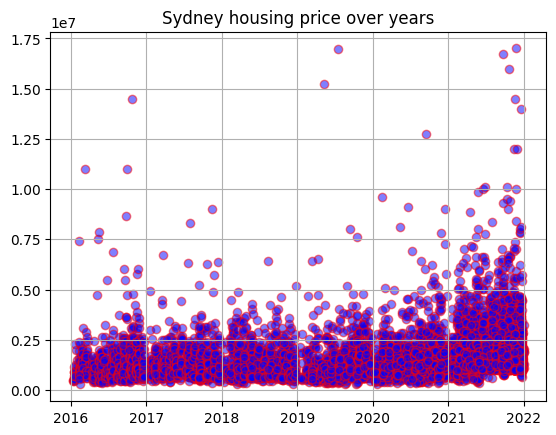

In [ ]:
plt.scatter(data_merge.date_sold, data_merge.price, marker='o', c='b',edgecolor='r', alpha=0.5)
plt.title("Sydney housing price over years")
plt.grid()
plt.show()

In [ ]:
suburbs = data_merge.groupby(['suburb'])['price'].aggregate('median')
print(suburbs)

suburb
Abbotsbury          1425000.0
Abbotsford          2107500.0
Alexandria          1350000.0
Allambie Heights    1875000.0
Allawah             1688000.0
                      ...    
Woronora            1203000.0
Yagoona              870000.0
Yarrawarrah         1492500.0
Yowie Bay           1980000.0
Zetland             1445000.0
Name: price, Length: 378, dtype: float64


In [ ]:
suburbs = pd.DataFrame(suburbs).reset_index()
suburbs.head()

suburb      price
0        Abbotsbury  1425000.0
1        Abbotsford  2107500.0
2        Alexandria  1350000.0
3  Allambie Heights  1875000.0
4           Allawah  1688000.0

In [ ]:
results = []

for i in suburbs['price']:
    if i <= suburbs['price'].quantile(0.25):
        results.append('low')
    elif i > suburbs['price'].quantile(0.25) and i <= suburbs['price'].quantile(0.50):
        results.append('medium_low')
    elif i > suburbs['price'].quantile(0.50) and i <= suburbs['price'].quantile(0.75):
        results.append('medium_high')
    else:
        results.append('high')


# add to new dataframe
suburbs['suburb_group'] = results

In [ ]:
suburbs.head()

suburb      price suburb_group
0        Abbotsbury  1425000.0   medium_low
1        Abbotsford  2107500.0         high
2        Alexandria  1350000.0   medium_low
3  Allambie Heights  1875000.0  medium_high
4           Allawah  1688000.0  medium_high

In [ ]:
suburb = suburbs['suburb']
suburb_group = suburbs['suburb_group']
suburb_dict = dict(zip(suburb, suburb_group))

In [ ]:
convert = data_merge.suburb
convert = list(convert)


# conversion into an array
new_list = []

for conversion in convert:
    for check in suburb_dict:
        if conversion == check:
            new_list.append(suburb_dict[check])
print(f"Length of dataframe : {len(data_merge)}")
print(f"Length of array : {len(new_list)}")

Length of dataframe : 7111
Length of array : 7111


In [ ]:
data_merge['suburb_group'] = new_list
data_merge.head()

price  date_sold   suburb  num_bath  num_bed  num_parking  property_size  \
0  452000 2016-01-13  Leumeah         1        3            1            344   
1  495000 2016-01-15  Leumeah         1        3            2            582   
2  473000 2016-01-19  Leumeah         1        3            3            581   
3  520000 2016-01-20  Leumeah         1        3            1            651   
4  585000 2017-09-22  Leumeah         1        3            1            436   

    type  suburb_population  suburb_median_income  suburb_sqkm  suburb_lat  \
0  House               9835                 32292        4.055   -34.05375   
1  House               9835                 32292        4.055   -34.05375   
2  House               9835                 32292        4.055   -34.05375   
3  House               9835                 32292        4.055   -34.05375   
4  House               9835                 32292        4.055   -34.05375   

   suburb_lng  suburb_elevation  cash_rate  property_inflation_index  \
0   150.83957                81        2.0                     150.9   
1   150.83957                81        2.0                     150.9   
2   150.83957                81        2.0                     150.9   
3   150.83957                81        2.0                     150.9   
4   150.83957                81        1.5                     174.0   

   km_from_cbd      Region  Postcode  English  Australian  Chinese  Greek  \
0        40.12  South West      2560     22.7        23.0      0.0    0.0   
1        40.12  South West      2560     22.7        23.0      0.0    0.0   
2        40.12  South West      2560     22.7        23.0      0.0    0.0   
3        40.12  South West      2560     22.7        23.0      0.0    0.0   
4        40.12  South West      2560     22.7        23.0      0.0    0.0   

   Irish  Indian  Scottish  Italian  Nepalese  Korean  Lebanese  Mongolian  \
0    6.8     3.4       5.6      0.0       0.0     0.0       0.0        0.0   
1    6.8     3.4       5.6      0.0       0.0     0.0       0.0        0.0   
2    6.8     3.4       5.6      0.0       0.0     0.0       0.0        0.0   
3    6.8     3.4       5.6      0.0       0.0     0.0       0.0        0.0   
4    6.8     3.4       5.6      0.0       0.0     0.0       0.0        0.0   

   ChineseScottish  Vietnamese  Thai  Filipino  Turkish  Iraqi  Maltese  \
0              0.0         0.0   0.0       0.0      0.0    0.0      0.0   
1              0.0         0.0   0.0       0.0      0.0    0.0      0.0   
2              0.0         0.0   0.0       0.0      0.0    0.0      0.0   
3              0.0         0.0   0.0       0.0      0.0    0.0      0.0   
4              0.0         0.0   0.0       0.0      0.0    0.0      0.0   

   KhmerCambodian  Assyrian  Bangladeshi  Indonesian  SriLankan  Samoan  \
0             0.0       0.0          0.0         0.0        0.0     0.0   
1             0.0       0.0          0.0         0.0        0.0     0.0   
2             0.0       0.0          0.0         0.0        0.0     0.0   
3             0.0       0.0          0.0         0.0        0.0     0.0   
4             0.0       0.0          0.0         0.0        0.0     0.0   

   German  ScottishChinese  Macedonian  Afghan suburb_group  
0     0.0              0.0         0.0     0.0          low  
1     0.0              0.0         0.0     0.0          low  
2     0.0              0.0         0.0     0.0          low  
3     0.0              0.0         0.0     0.0          low  
4     0.0              0.0         0.0     0.0          low

In [ ]:
data_merge['type'].value_counts()

type
House                            5831
Apartment / Unit / Flat           609
Townhouse                         178
Semi-Detached                     131
Vacant land                       102
Villa                              87
Terrace                            60
Duplex                             53
Block of Units                     30
New House & Land                   10
Development Site                    6
New Apartments / Off the Plan       6
Studio                              5
New land                            2
Acreage / Semi-Rural                1
Name: count, dtype: int64

In [ ]:
data_merge['type'].unique()

array(['House', 'Townhouse', 'Vacant land', 'Semi-Detached', 'Duplex',
       'Apartment / Unit / Flat', 'Villa', 'Terrace', 'New House & Land',
       'Block of Units', 'Development Site', 'Studio',
       'New Apartments / Off the Plan', 'New land',
       'Acreage / Semi-Rural'], dtype=object)

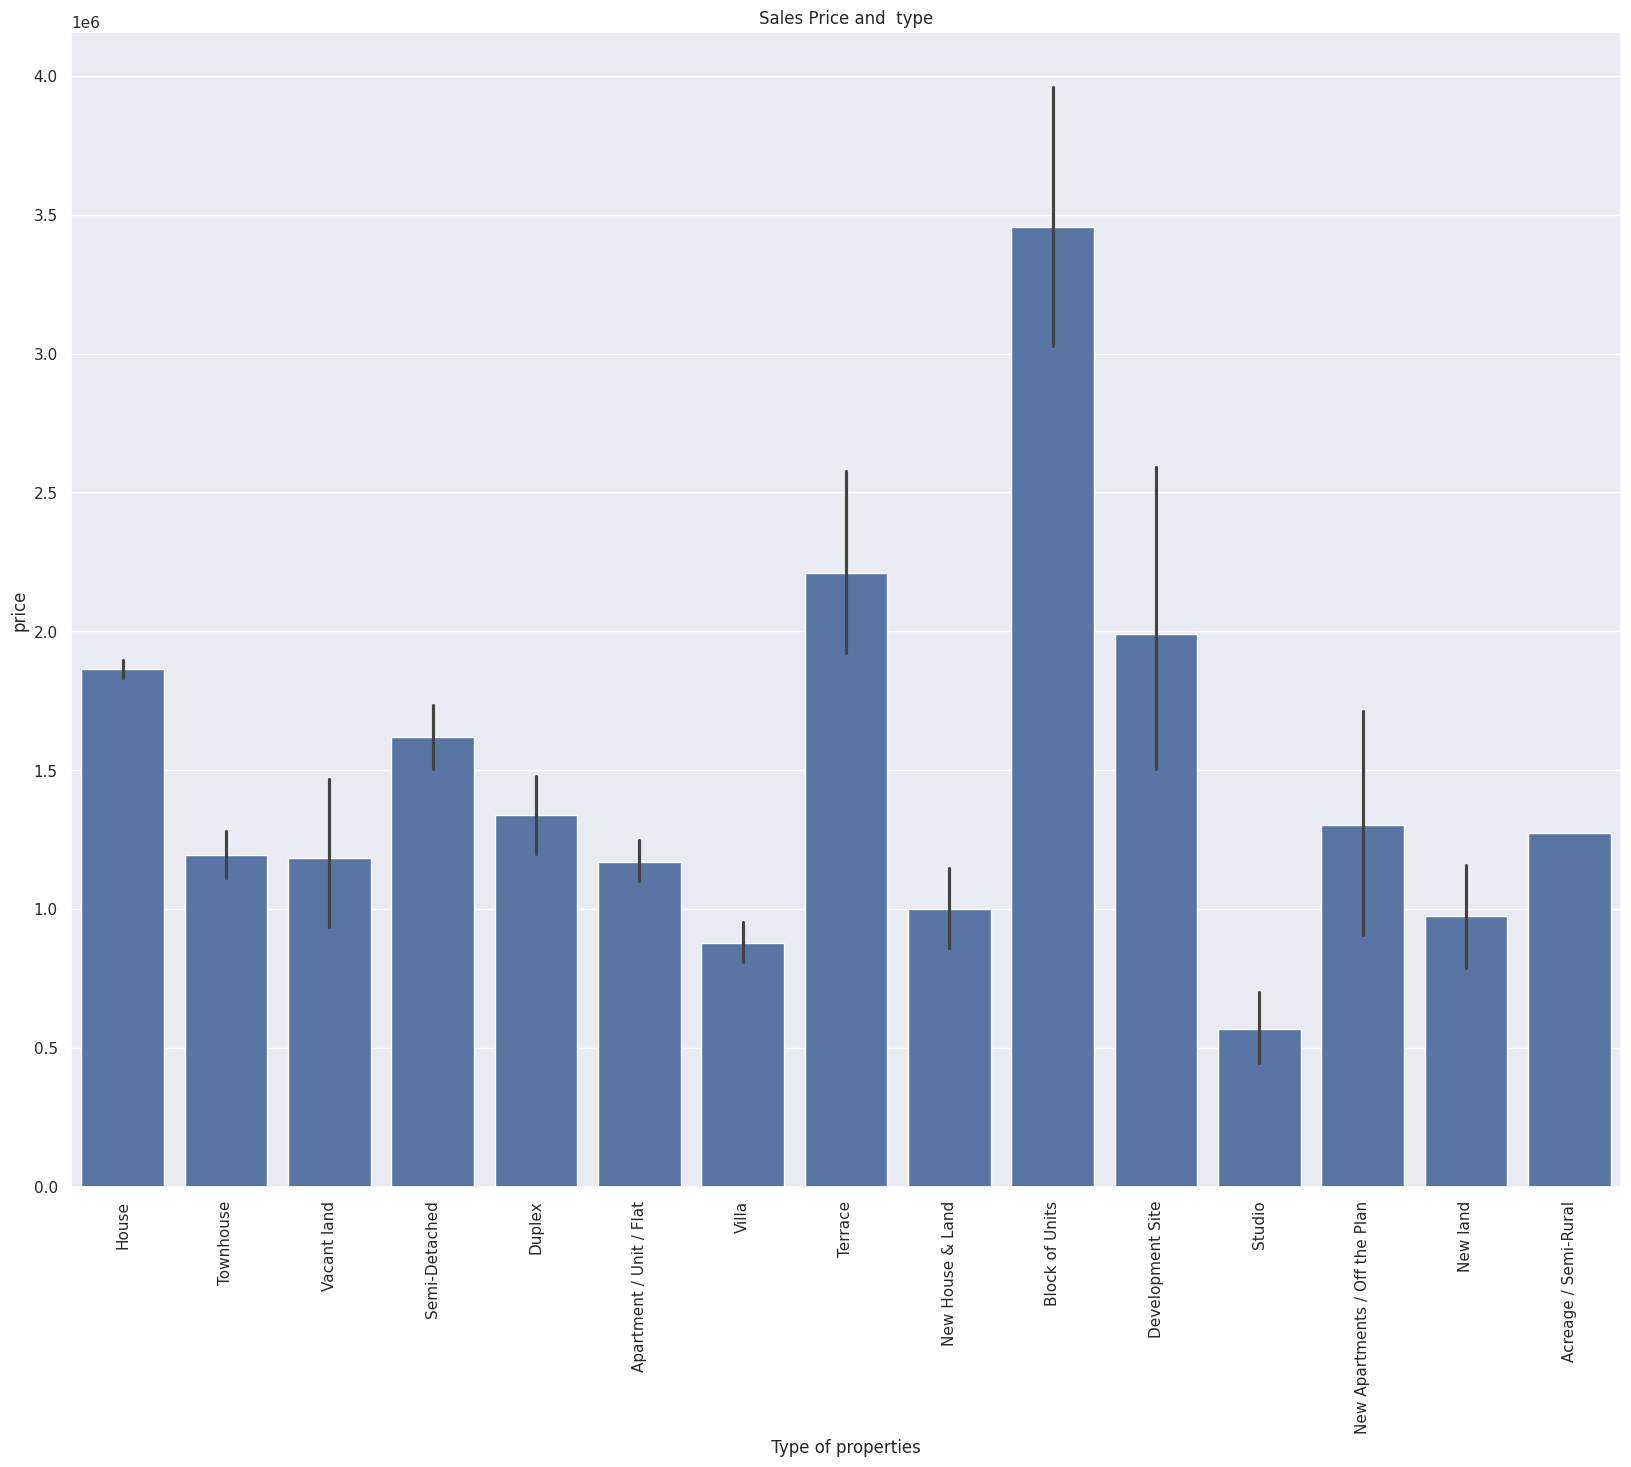

In [ ]:
sns.set()
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(1,1,figsize=(20,15),sharex=False)

#county_order = data_merge.sort_values('price')['Region']

#sns.barplot(x='State', y='Headcount Ratio (%)', data=gdf_regions, ax=ax1, color='c', )

sns.barplot(ax=ax,data =data_merge, x="type", y="price" )
ax.set_ylabel("price")
ax.set_xlabel(" Type of properties ")
ax.title.set_text("Sales Price and  type")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
types = data_merge['type'].to_list()

# groupings
house = ['House', 'New House & Land', 'Villa','Duplex','Terrace']
apartments = ['Apartment / Unit / Flat', 'Townhouse', 'Studio']

# new array
new_types = []

for conversion in types:
    if conversion in house:
        new_types.append('house')
    elif conversion in apartments:
        new_types.append('apartments')
    else:
        new_types.append('other')

# inputting into dataframe
data_merge['type'] = new_types

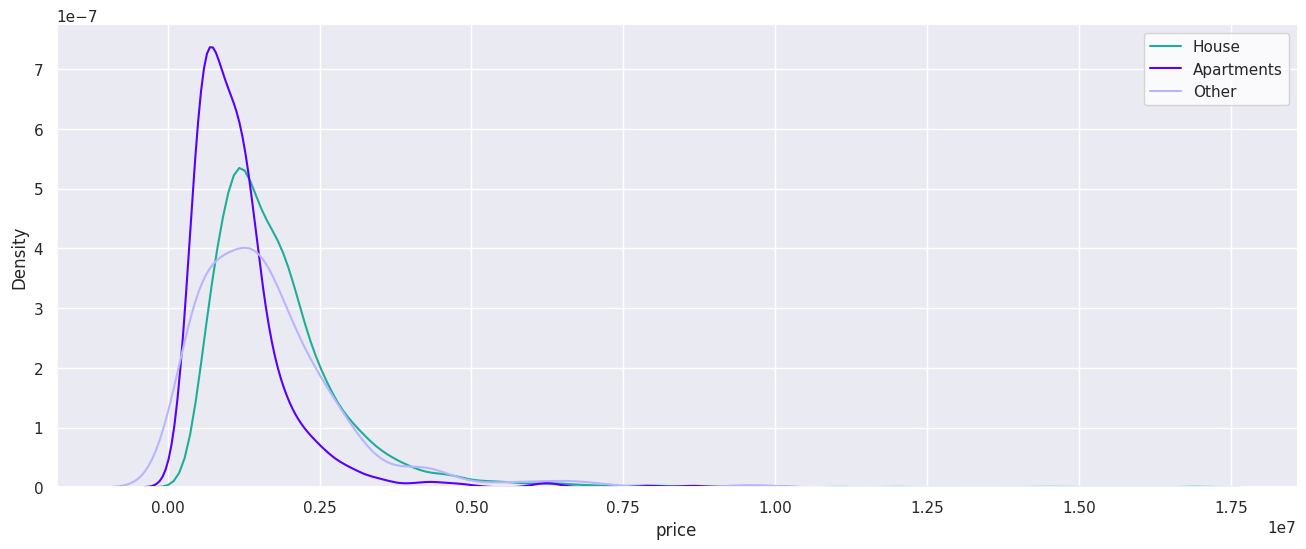

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16, 6), dpi=100)
sns.set_theme(style='whitegrid')
sns.despine()
sns.kdeplot(data_merge[data_merge['type']=='house']['price'], color='#1EAE98', ax=ax, label='House')
sns.kdeplot(data_merge[data_merge['type']=='apartments']['price'], color='#5800FF', ax=ax, label='Apartments')
sns.kdeplot(data_merge[data_merge['type']=='other']['price'], color='#B8B5FF', ax=ax, label='Other')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
sqft_trend = pd.concat([data_merge['price'], data_merge['property_size']], axis = 1)
fig = px.scatter(data_merge, x = 'property_size', y = 'price', title = 'Price vs Property Size', labels = 'dict(price = "Price ", sqft_living = "Sqft ")')
fig.update_layout(yaxis_range = [0 , 16500000], xaxis_range = [0 , 7000], width = 800, height = 600)
fig.show()

In [ ]:
import plotly.express as px
sqft_trend = pd.concat([data_merge['price'], data_merge['km_from_cbd']], axis = 1)
fig = px.scatter(data_merge, x = 'km_from_cbd', y = 'price', title = 'Price vs KM from CBD', labels = dict(price = "Price ", sqft_living = "Sqft "))
fig.update_layout(yaxis_range = [0 , 16500000], xaxis_range = [0 , 60], width = 800, height = 600)
fig.show()

In [ ]:
sqft_trend = pd.concat([data_merge['price'], data_merge['date_sold']], axis = 1)
fig = px.scatter(data_merge, x = 'date_sold', y = 'price', title = 'Price vs Date Sold', labels = dict(price = "Price ", sqft_living = "Sqft "))
fig.update_layout(yaxis_range = [0 , 16500000], xaxis_range = ["2016", "2022"], width = 800, height = 600)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



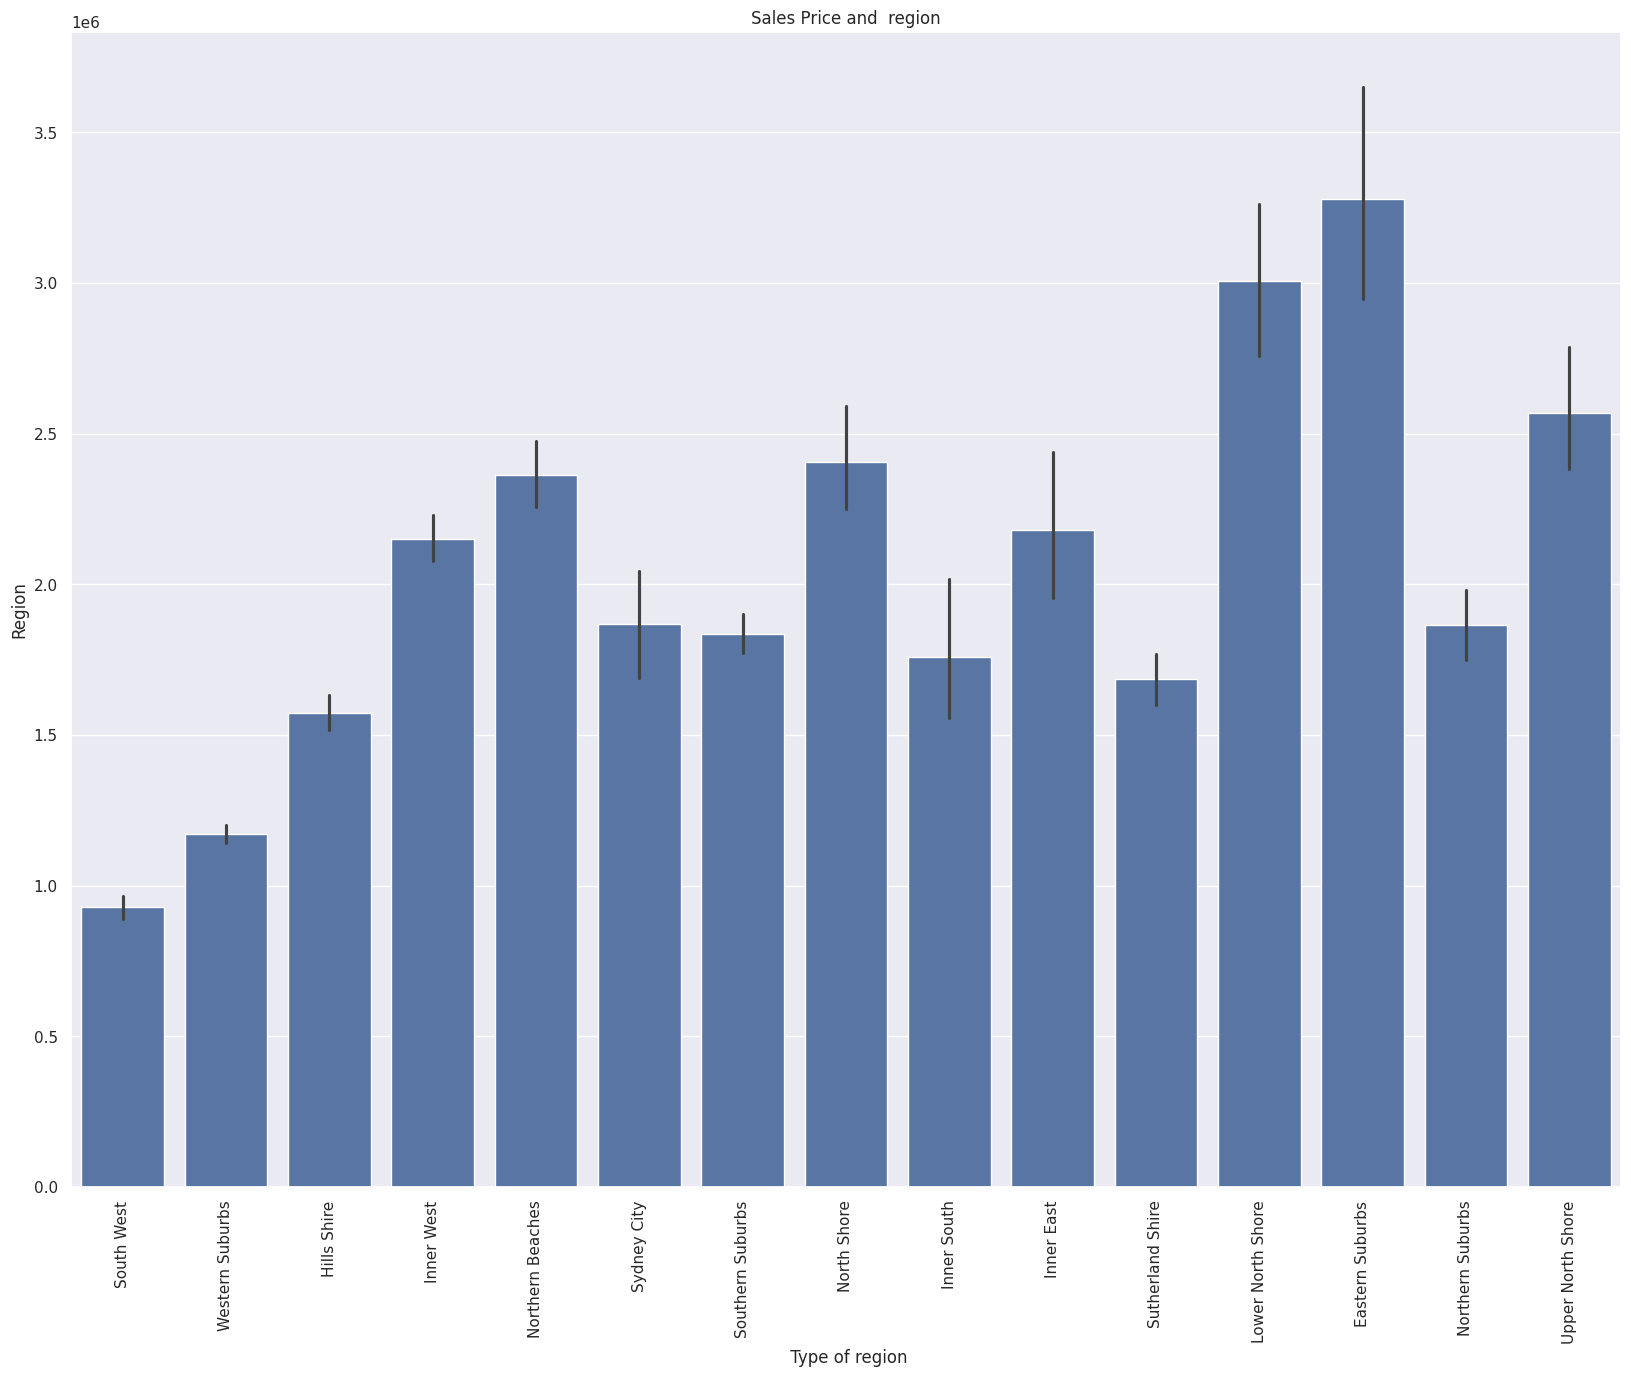

In [ ]:
sns.set()
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(1,1,figsize=(20,15),sharex=False)

#county_order = data_merge.sort_values('price')['Region']

#sns.barplot(x='State', y='Headcount Ratio (%)', data=gdf_regions, ax=ax1, color='c', )

sns.barplot(ax=ax,data =data_merge, x="Region", y="price" )
ax.set_ylabel("Region")
ax.set_xlabel(" Type of region")
ax.title.set_text("Sales Price and  region")
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'largest_bedroom' is not defined

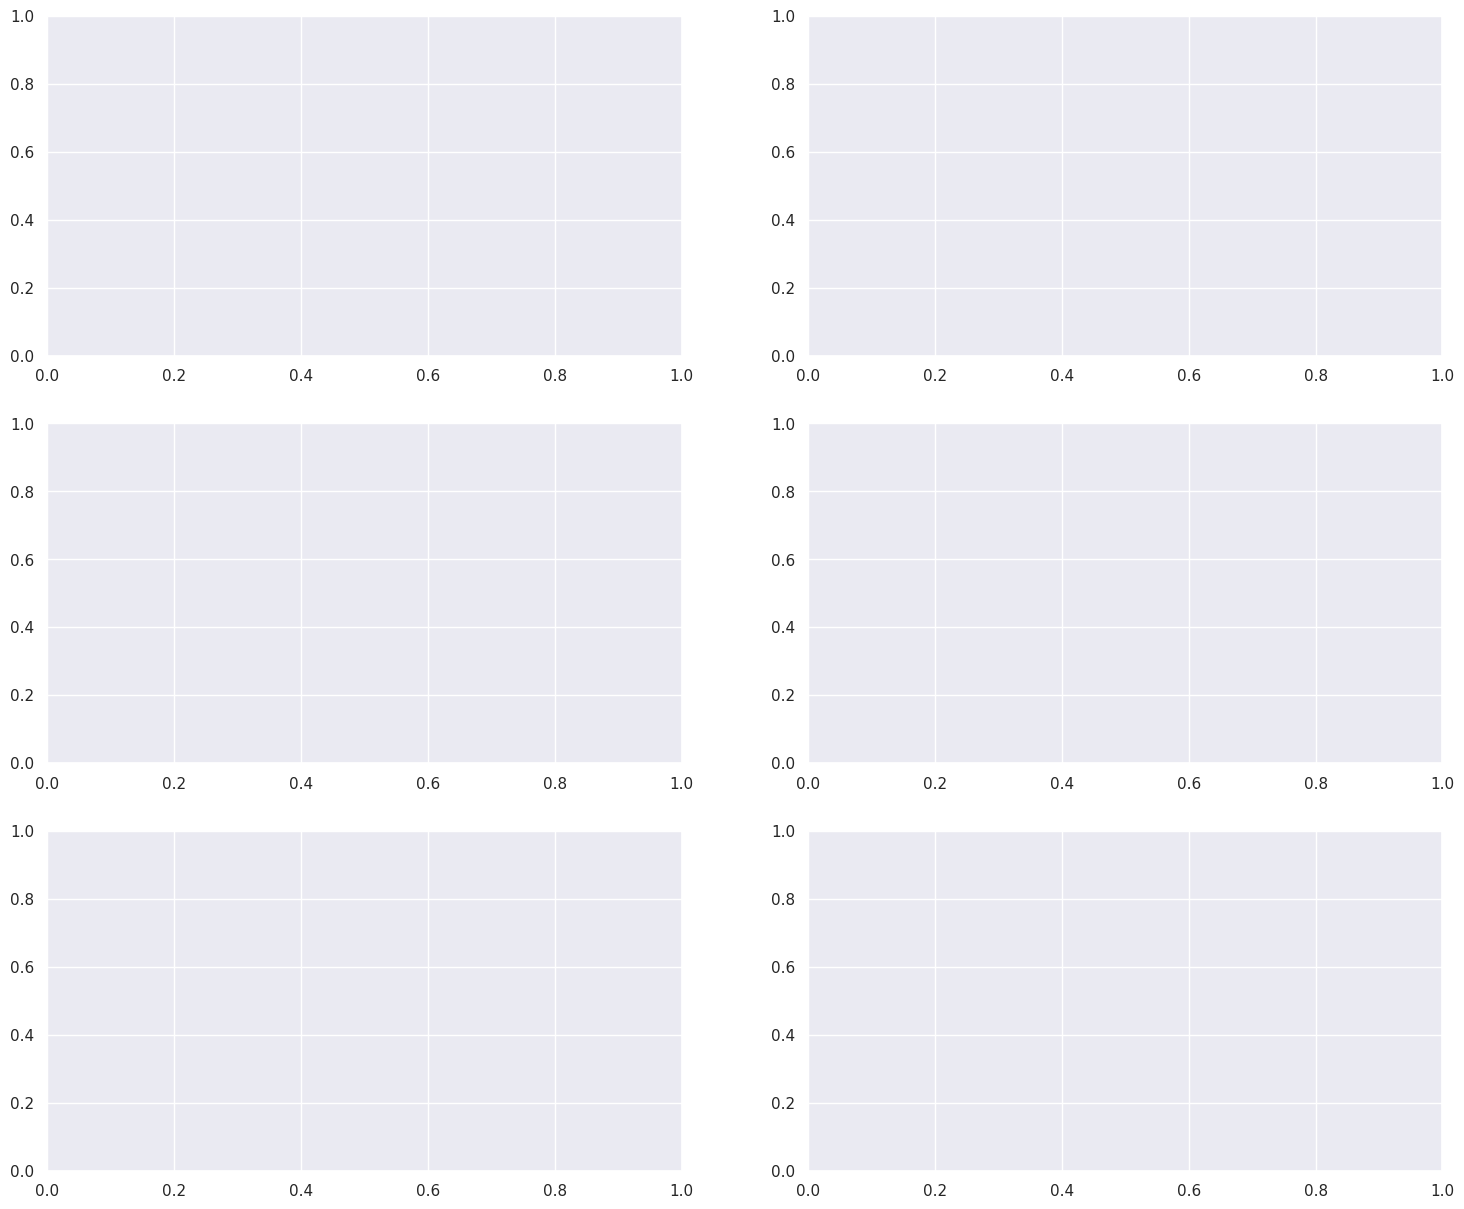

In [ ]:
sns.set()
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(3,2,figsize=(18,15))

sns.barplot(ax=ax[0, 0],data =largest_bedroom, x="num_bed", y="price")
ax[0,0].set_ylabel("Sales Price")
ax[0,0].set_xlabel(" Type of number of bed")
ax[0,0].title.set_text("Sales Price and  number of bed")

sns.barplot(ax=ax[0, 1],data =data_merge, x="num_bath", y="price")
ax[0,1].set_ylabel("Sales Price")
ax[0,1].set_xlabel("Number of bath")
ax[0,1].title.set_text("Sales Price and  number of bath")

sns.barplot(ax=ax[1, 0],data =data_merge, x="num_parking", y="price")
ax[1,0].set_ylabel("Sales Price")
ax[1,0].set_xlabel("Number of parking")
ax[1,0].title.set_text("Sales Price and  number of parking")


sns.barplot(ax=ax[1, 1],data =data_merge, x="type", y="price")
ax[1,0].set_ylabel("Sales Price")
ax[1,0].set_xlabel("type")
ax[1,0].title.set_text("Sales Price and type")


sns.barplot(ax=ax[2, 0],data =data_merge, x="suburb_median_income", y="price")
ax[1,0].set_ylabel("Sales Price")
ax[1,0].set_xlabel("suburb_median_income")
ax[1,0].title.set_text("Sales Price and suburb_median_income")

sns.barplot(ax=ax[2, 1],data =data_merge, x="suburb_population", y="price")
ax[1,0].set_ylabel("Sales Price")
ax[1,0].set_xlabel("suburb_population")
ax[1,0].title.set_text("Sales Price and suburb population")

plt.show()

In [ ]:
from folium import Map
from folium.plugins import HeatMap
heat_data = [[row['suburb_lat'],row['suburb_lng']] for _, row in data_merge.iterrows()]
heat_map = Map(data_merge[['suburb_lat', 'suburb_lng']].mean(axis=0), zoom_start=10)
HeatMap(heat_data, radius=10).add_to(heat_map)
heat_map

/usr/local/lib/python3.10/dist-packages/folium/utilities.py:86: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
import branca
import folium
inferno_colors = [
    (0, 0, 4),
    (40, 11, 84),
    (101, 21, 110),
    (159, 42, 99),
    (212, 72, 66),
    (245, 125, 21),
    (250, 193, 39),
    (252, 255, 164)
]

map = folium.Map(data_merge[['suburb_lat', 'suburb_lng']].mean(axis=0), zoom_start = 11)
lat = list(data_merge.suburb_lat)
lon = list(data_merge.suburb_lng)
populations = list(data_merge.suburb_population)
targets = list(data_merge.price)

# define colormap using inferno colors and normalizing them according MedHouseVal
cmap = branca.colormap.LinearColormap(
    inferno_colors, vmin=min(targets), vmax=max(targets)
)

for loc, population, target in zip(zip(lat, lon), populations, targets):
    folium.Circle(
        location=loc,
        radius=population/20,
        fill=True,
            color=cmap(target),
        fill_opacity=0.5,
        weight=0
    ).add_to(map)

map.add_child(cmap)
display(map)

/usr/local/lib/python3.10/dist-packages/folium/utilities.py:86: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
prediction_df= data_merge.copy
prediction_df=data_merge.drop(['date_sold','suburb_lat','suburb_lng','suburb_group','Postcode','Region','type','suburb'], axis='columns')
prediction_df

price  num_bath  num_bed  num_parking  property_size  \
0      452000         1        3            1            344   
1      495000         1        3            2            582   
2      473000         1        3            3            581   
3      520000         1        3            1            651   
4      585000         1        3            1            436   
...       ...       ...      ...          ...            ...   
7106  1900000         2        2            1            124   
7107  1000000         2        5            4            601   
7108  1065000         3        3            2            949   
7109  1000000         2        4            2            910   
7110  1115000         2        4            2            639   

      suburb_population  suburb_median_income  suburb_sqkm  suburb_elevation  \
0                  9835                 32292        4.055                81   
1                  9835                 32292        4.055                81   
2                  9835                 32292        4.055                81   
3                  9835                 32292        4.055                81   
4                  9835                 32292        4.055                81   
...                 ...                   ...          ...               ...   
7106               2158                 87360        0.198                42   
7107                827                 33852       20.431                63   
7108                827                 33852       20.431                63   
7109                827                 33852       20.431                63   
7110               3135                 21060        0.899                25   

      cash_rate  property_inflation_index  km_from_cbd  English  Australian  \
0           2.0                     150.9        40.12     22.7        23.0   
1           2.0                     150.9        40.12     22.7        23.0   
2           2.0                     150.9        40.12     22.7        23.0   
3           2.0                     150.9        40.12     22.7        23.0   
4           1.5                     174.0        40.12     22.7        23.0   
...         ...                       ...          ...      ...         ...   
7106        0.1                     220.1         1.99     20.3         9.7   
7107        0.1                     220.1        34.17     21.6        22.7   
7108        0.1                     220.1        34.17     21.6        22.7   
7109        0.1                     220.1        34.17     21.6        22.7   
7110        0.1                     220.1        30.09     15.1        17.7   

      Chinese  Greek  Irish  Indian  Scottish  Italian  Nepalese  Korean  \
0         0.0    0.0    6.8     3.4       5.6      0.0       0.0     0.0   
1         0.0    0.0    6.8     3.4       5.6      0.0       0.0     0.0   
2         0.0    0.0    6.8     3.4       5.6      0.0       0.0     0.0   
3         0.0    0.0    6.8     3.4       5.6      0.0       0.0     0.0   
4         0.0    0.0    6.8     3.4       5.6      0.0       0.0     0.0   
...       ...    ...    ...     ...       ...      ...       ...     ...   
7106     15.8    0.0    8.1     0.0       6.2      0.0       0.0     0.0   
7107      0.0    0.0    5.7     3.5       0.0      0.0       0.0     0.0   
7108      0.0    0.0    5.7     3.5       0.0      0.0       0.0     0.0   
7109      0.0    0.0    5.7     3.5       0.0      0.0       0.0     0.0   
7110      0.0    0.0    4.3     0.0       0.0      0.0       0.0     0.0   

      Lebanese  Mongolian  ChineseScottish  Vietnamese  Thai  Filipino  \
0          0.0        0.0              0.0         0.0   0.0       0.0   
1          0.0        0.0              0.0         0.0   0.0       0.0   
2          0.0        0.0              0.0         0.0   0.0       0.0   
3          0.0        0.0              0.0         0.0   0.0       0.0   
4          0.0        0.0              0.0    

In [ ]:
X=prediction_df.drop(['price'],axis=1)
y=prediction_df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
scaler=StandardScaler()
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test=scaler.transform(X_test)

In [ ]:
#ALL_Types_of_Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [ ]:
def run_model(model,X_train,X_test,y_train,y_test):
    Scaled_X_train=scaler.fit_transform(X_train).round()
    Scaled_X_test=scaler.transform(X_test).round()
    model.fit(Scaled_X_train,y_train)
    preds=model.predict(Scaled_X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

In [ ]:
lr_model=LinearRegression()
run_model(lr_model,X_train,X_test,y_train,y_test)
preds=lr_model.predict(Scaled_X_test)

MAE: 483836.89376625593
RMSE: 825841.4508600992


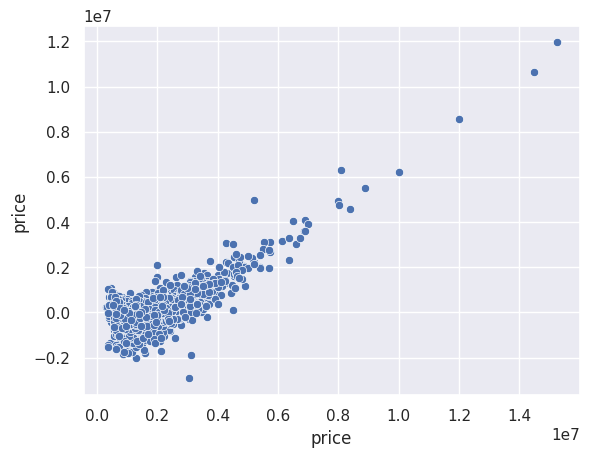

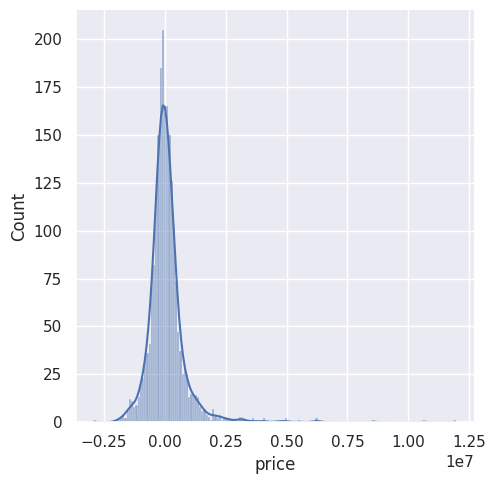

In [ ]:
residuals=y_test-preds
residuals
sns.scatterplot(x=y_test,y=residuals)
sns.displot(residuals,kde=True)

LinearRegression()

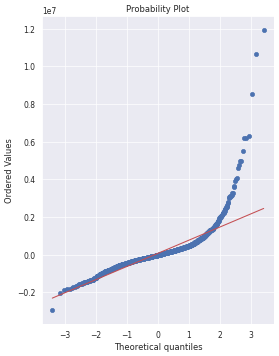

In [ ]:
import scipy as sp
g,ax=plt.subplots(figsize=(6,8),dpi=50)
_=sp.stats.probplot(residuals,plot=ax)
final_model=LinearRegression()
final_model.fit(X_train,y_train)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4977, 40), (4977,), (2134, 40), (2134,))

Text(0, 0.5, 'Housing Price')

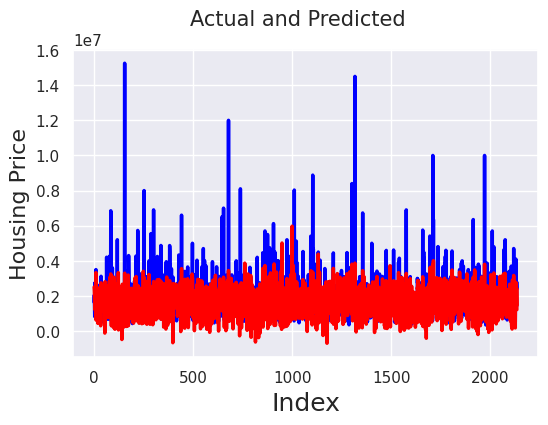

In [ ]:
c = [i for i in range(1,2135,1)] # generating index
fig = plt.figure(figsize=(6,4))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,preds, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)

In [ ]:
print(final_model.coef_)

[ 1.90952483e+05  7.73073088e+04  3.50767572e+04  4.17962300e+02
  2.14514438e+00  2.12610029e+01  1.08144499e+03 -1.33076066e+03
 -6.45429990e+04  8.49620180e+03 -2.18478904e+04  5.10626894e+04
 -4.84360120e+04  1.71636744e+04  2.87914722e+04  2.68882703e+04
  1.27869053e+04  3.41602680e+04  2.37376813e+04 -3.61130758e+03
  2.00843074e+04  1.24194221e+04 -1.98972230e+05  1.89174898e-09
  2.15756376e+02 -2.05407795e+04  1.49623387e+04 -2.08061319e+04
  5.60173405e+04 -5.84639580e+03 -3.41242412e-09  1.20300485e+04
  2.98609231e+04  5.19862468e+04  9.23137122e-10  8.33787920e+04
  3.61649711e+04  0.00000000e+00  2.37581836e+04  1.64297683e+05]


In [ ]:
print(final_model.intercept_)

-1881184.395333037


In [ ]:
from time import time
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor

rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end=time()
train_time_rand=end-start
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5,min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
end=time()
train_time_g=end-start
gradient=est.score(X_test,y_test)

pred = est.predict(X_test)
exp_est = explained_variance_score(pred,y_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start
pred=ada.predict(X_test)
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
exp_ada = explained_variance_score(predict,y_test)

In [ ]:
from sklearn.tree  import DecisionTreeRegressor
decision=DecisionTreeRegressor()
start = time()
decision.fit(X_train, y_train)
end=time()
train_time_dec=end-start
decc=decision.score(X_test,y_test)
decpredict = decision.predict(X_test)
exp_dec = explained_variance_score(decpredict,y_test)

In [ ]:
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree'],
    'Score': [gradient,adab,random,decc],
     'Variance Score': [exp_est,exp_ada,exp_rand,exp_dec]})

models_cross.sort_values(by='Score', ascending=False)

Model     Score  Variance Score
0  Gradient Boosting  0.690813        0.586974
2      Random Forest  0.688659        0.522213
3      Decision Tree  0.399355        0.399352
1           AdaBoost  0.309478       -0.665788

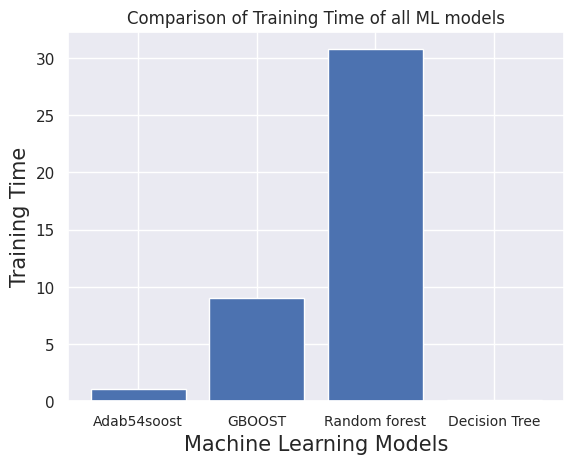

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Adab54soost', 'GBOOST', 'Random forest', 'Decision Tree']
Train_Time = [
    train_time_ada,
    train_time_g,
    train_time_rand,
    train_time_dec

]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()